# Paleomagnetic Data Analysis of Late Stage Volcanics from the Midcontinent Rift
This Jupyter notebook is provided as the main Data Repository for a manuscript in review entitled **The end of Midcontinent Rift magmatism and the paleogeography of Laurentia** by Luke M. Fairchild, Nicholas L. Swanson-Hysell, Jahandar Ramenzani, Courtney J. Sprain, and Samuel A. Bowring.

The code block below imports necessary libraries and defines functions that will be used in the data analysis below. The modules ```pmag.py```, ```pmagplotlib.py``` and ```ipmag.py``` are from the PmagPy software package (https://github.com/ltauxe/PmagPy). The current version of these modules (PmagPy 3.4) are included in the repository with this notebook. Other necessary function libraries (```matplotlib```, ```pandas```, ```Basemap```, ```IPython```, ```numpy```, ```scipy```) are included with standard scientific Python distributions.

## Import and develop functions for use within the Jupyter notebook

In [1]:
import pmagpy_3_4.pmag as pmag
import pmagpy_3_4.pmagplotlib as pmagplotlib
import pmagpy_3_4.ipmag as ipmag

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import matplotlib.patches as mpatch
from matplotlib.collections import PatchCollection
import pandas as pd
from IPython.core.display import HTML
import numpy as np
import scipy as sp
from scipy import special
from IPython.display import Image

/Users/lukefairchild765/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This notebook runs with figures inline in the Jupyter notebook (instead of opening up in another window) by executing this command:

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

Throughout this analysis there will be maps that show pole positions. The pole_figure_appearance function controls aspects of the appearance of these maps and eliminates the need to make these customizations for every plot.

In [3]:
def pole_figure_appearance(size = (7,7)):
    m = Basemap(projection='ortho',lat_0=35,lon_0=200,resolution='c',area_thresh=50000)
    plt.figure(figsize=size)
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='white',zorder=1)
    m.drawmapboundary(fill_color='white')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    return m

## Schroeder-Lutsen Basalts
### Prior data
Tauxe and Kodama (2009) published data from sites of the North Shore Volcanic Group and Schroeder-Lutsen Basalts that was the first study of these units to use modern methods. Books (1968, 1972) and Palmer (1970) also developed data that can largely be considered to be superseded by the Tauxe and Kodama results. In the code below, the Tauxe and Kodama (2009) data are imported and then the data that are from the Schroeder-Lutsen Basalts are split off from the rest of the data that were generated by Tauxe and Kodama (2009) from the North Shore Volcanic Group.

In [5]:
Tauxe_NSVG_Data=pd.read_csv('../Data/Previous_studies/Tauxe2009a_data.csv',sep=',')
Tauxe_NSVG_Data.head()

site_ID  dec_tc  inc_tc  a95  n  site_lat  site_lon  pole_lat  pole_lon  \
0   ns002   283.5    38.7  6.6  4   47.7341  -90.4292      24.9     185.2   
1   ns003   286.9    47.9  3.8  5   47.7371  -90.4114      32.0     188.9   
2   ns004   290.0    47.8  5.6  5   47.7328  -90.4363      34.0     186.7   
3   ns005   299.8    37.6  5.3  4   47.7254  -90.4430      35.3     172.4   
4   ns006   294.8    38.8  3.0  5   47.7161  -90.4904      32.5     177.0   

  rem_type sequence  unit  
0      hem     nneu  ngha  
1    mixed     nneu  ngha  
2      mag     nneu  ngha  
3      mag     nneu   ngt  
4      mag      nsl   NaN

The **sequence** column contains an assignment of the sequence with 'nsl' signifying that we interpret the flow to be within the Schroeder-Lutsen basalts. A new dataframe can be made with only these flows.

Plong: 182.1  Plat: 35.8
Number of directions in mean (n): 47
Angular radius of 95% confidence (A_95): 3.1
Precision parameter (k) estimate: 45.7
Plong: 180.5  Plat: 28.8
Number of directions in mean (n): 10
Angular radius of 95% confidence (A_95): 6.5
Precision parameter (k) estimate: 55.6


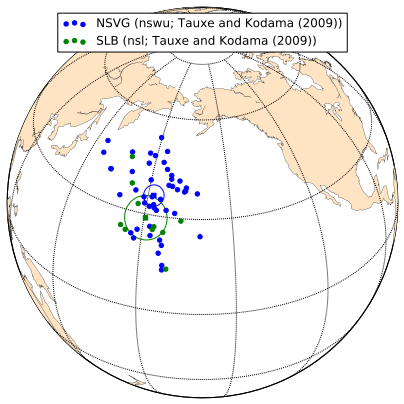

In [6]:
NSVG_nswu = Tauxe_NSVG_Data.ix[Tauxe_NSVG_Data['sequence'] == 'nswu']
NSVG_nswu.reset_index(inplace=True)

NSVG_nswu_VGPs = ipmag.make_di_block(NSVG_nswu['pole_lon'],NSVG_nswu['pole_lat'])
NSVG_nswu_mean = pmag.fisher_mean(NSVG_nswu_VGPs)
ipmag.print_pole_mean(NSVG_nswu_mean)

NSVG_nsl = Tauxe_NSVG_Data.ix[Tauxe_NSVG_Data['sequence'] == 'nsl']
NSVG_nsl.reset_index(inplace=True)
    
NSVG_nsl_VGPs = ipmag.make_di_block(NSVG_nsl['pole_lon'],NSVG_nsl['pole_lat'])
NSVG_nsl_mean = pmag.fisher_mean(NSVG_nsl_VGPs)
ipmag.print_pole_mean(NSVG_nsl_mean)

m = pole_figure_appearance()

ipmag.plot_vgp(m,NSVG_nswu['pole_lon'].tolist(),NSVG_nswu['pole_lat'].tolist(),
               color='b',label='NSVG (nswu; Tauxe and Kodama (2009))')
ipmag.plot_pole(m,NSVG_nswu_mean['dec'],NSVG_nswu_mean['inc'],NSVG_nswu_mean['alpha95'],
                marker='s',color='b')
ipmag.plot_vgp(m,NSVG_nsl['pole_lon'].tolist(),NSVG_nsl['pole_lat'].tolist(),
               color='g',label='SLB (nsl; Tauxe and Kodama (2009))')
ipmag.plot_pole(m,NSVG_nsl_mean['dec'],NSVG_nsl_mean['inc'],NSVG_nsl_mean['alpha95'],
                marker='s',color='g')
plt.legend(loc='upper center')
plt.show()

{'Dec': 180.5436552009686,
 'Inc': 28.803422228130206,
 'Me': 0.65209594384149339,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 0.98495553684353243,
 'Mu_critical': 1.207,
 'N': 10,
 'Test_result': 'consistent with Fisherian model'}

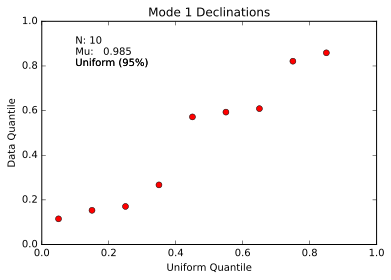

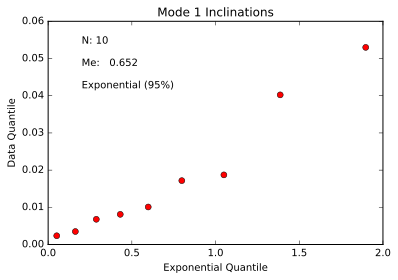

In [7]:
ipmag.fishqq(NSVG_nsl['pole_lon'].tolist(),NSVG_nsl['pole_lat'].tolist())

### New data from Two Island River

We present new paleomagnetic data from 40 Schroeder-Lutsen basalt flows exposed within Two Island River. Magnetizations held by magnetite and those held by hematite or maghemite are virtually identical (see equal area plots below), which suggests oxidation of these lava flows in association with eruption or shortly thereafter.

In [8]:
SLB_Data_all = pd.read_csv('../Data/SLB/pmag_results.txt',sep='\t',skiprows=1)
SLB_Data_all_tc = SLB_Data_all.ix[SLB_Data_all['tilt_correction'] == 100.0]
SLB_Data_hem = SLB_Data_all.ix[SLB_Data_all['pole_comp_name'] == 'hem']
SLB_Data_hem = SLB_Data_hem.ix[SLB_Data_hem['tilt_correction'] == 100.0]
SLB_Data_hem.reset_index
SLB_Data = SLB_Data_all.ix[SLB_Data_all['pole_comp_name'] == 'mag']
SLB_Data = SLB_Data.ix[SLB_Data['tilt_correction'] == 100.0]
SLB_Data.reset_index()
SLB_Data.head()

average_age  average_age_sigma average_age_unit  average_alpha95  \
2        1088.0                3.0               Ma              3.1   
6        1088.0                3.0               Ma              4.0   
10       1088.0                3.0               Ma              3.9   
14       1088.0                3.0               Ma              2.7   
18       1088.0                3.0               Ma              3.8   

    average_dec  average_height  average_inc  average_k  average_lat  \
2         270.2           443.0         26.6        285      47.5367   
6         274.2           443.0         28.1        165      47.5367   
10        289.5           443.0         51.3        204      47.5344   
14        292.9           443.0         53.3        427      47.5342   
18        287.9           443.0         55.2        218      47.5341   

    average_lon  ...   pmag_criteria_codes  pmag_result_name  pole_comp_name  \
2      -90.9400  ...                ACCEPT   VGP Site: SLB01             mag   
6      -90.9400  ...                ACCEPT   VGP Site: SLB02             mag   
10     -90.9350  ...                ACCEPT   VGP Site: SLB03             mag   
14     -90.9348  ...                ACCEPT   VGP Site: SLB04             mag   
18     -90.9350  ...                ACCEPT   VGP Site: SLB05             mag   

                             result_description tilt_correction  vgp_dm  \
2   Site VGP, coord system = 100 component: hem           100.0     2.3   
6   Site VGP, coord system = 100 component: hem           100.0     3.1   
10  Site VGP, coord system = 100 component: hem           100.0     4.2   
14  Site VGP, coord system = 100 component: hem           100.0     3.1   
18  Site VGP, coord system = 100 component: hem           100.0     4.5   

   vgp_dp vgp_lat vgp_lon vgp_n  
2     4.1    10.5   188.5   9.0  
6     5.3    13.8   186.3   9.0  
10    5.1    35.6   189.6   8.0  
14    3.6    39.0   189.3   8.0  
18    5.0    36.8   194.3   8.0  

[5 rows x 32 columns]

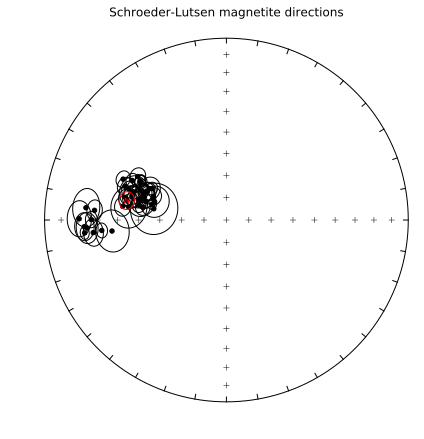

In [9]:
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)

SLB_dec = SLB_Data['average_dec'].tolist()
SLB_inc = SLB_Data['average_inc'].tolist()
SLB_a95 = SLB_Data['average_alpha95'].tolist()

for i in range(len(SLB_dec)):
    ipmag.plot_di_mean(SLB_dec[i], SLB_inc[i], SLB_a95[i])
    
SLB_mean_dir = ipmag.fisher_mean(SLB_dec,SLB_inc)

ipmag.plot_di_mean(SLB_mean_dir['dec'],SLB_mean_dir['inc'],SLB_mean_dir['alpha95'],marker='s', color='r')
plt.title('Schroeder-Lutsen magnetite directions')
    
plt.savefig('Code_output/All_SLB_mag_data.pdf')
plt.show()

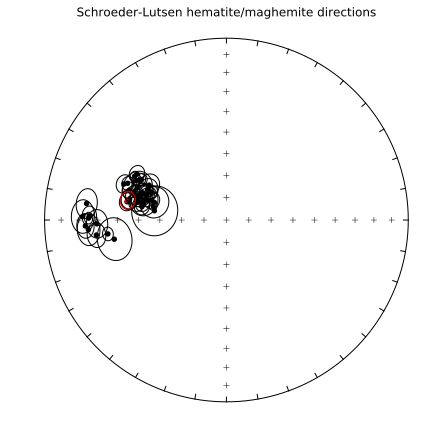

In [10]:
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)

SLB_hem_dec = SLB_Data_hem['average_dec'].tolist()
SLB_hem_inc = SLB_Data_hem['average_inc'].tolist()
SLB_hem_a95 = SLB_Data_hem['average_alpha95'].tolist()

for i in range(len(SLB_hem_dec)):
    ipmag.plot_di_mean(SLB_hem_dec[i], SLB_hem_inc[i], SLB_hem_a95[i])
    
SLB_hem_mean_dir = ipmag.fisher_mean(SLB_hem_dec,SLB_hem_inc)

ipmag.plot_di_mean(SLB_hem_mean_dir['dec'],SLB_hem_mean_dir['inc'],SLB_hem_mean_dir['alpha95'],marker='s', color='r')
plt.title('Schroeder-Lutsen hematite/maghemite directions')

plt.savefig('Code_output/All_SLB_hem_data.pdf')
plt.show()

Below, we calculate the average angular difference between the magnetite and hematite paleomagnetic directions of each sampled flow.

In [12]:
SLB_samples = pd.read_csv('../Data/SLB/pmag_specimens.txt',sep='\t',skiprows=1)
SLB_samples = SLB_samples.ix[SLB_samples['specimen_tilt_correction'] == 100.0]

In [13]:
SLB_mag_hem_diff = []
for sample in SLB_samples.er_specimen_name.unique().tolist():
    try:
        mag_dec = float(SLB_samples.loc[SLB_samples['er_specimen_name']==sample].loc[SLB_samples['specimen_comp_name']=='mag'].specimen_dec)
        mag_inc = float(SLB_samples.loc[SLB_samples['er_specimen_name']==sample].loc[SLB_samples['specimen_comp_name']=='mag'].specimen_inc)
        hem_dec = float(SLB_samples.loc[SLB_samples['er_specimen_name']==sample].loc[SLB_samples['specimen_comp_name']=='hem'].specimen_dec)
        hem_inc = float(SLB_samples.loc[SLB_samples['er_specimen_name']==sample].loc[SLB_samples['specimen_comp_name']=='hem'].specimen_inc)
        SLB_mag_hem_diff.append(pmag.angle([mag_dec, mag_inc],[hem_dec, hem_inc]))
    except:
        continue
print 'Average angle between magnetite and hematite/maghemite fits for all samples: ', np.average(np.array(SLB_mag_hem_diff))

Average angle between magnetite and hematite/maghemite fits for all samples:  2.86292160508


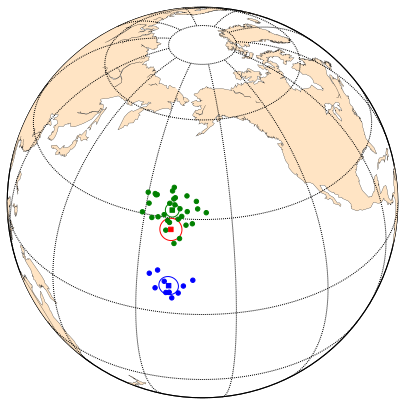

In [14]:
SLB_Data_low_lat = SLB_Data.ix[SLB_Data['vgp_lat'] < 15]
SLB_Data_hi_lat = SLB_Data.ix[SLB_Data['vgp_lat'] >= 15]

new_SLB_mean = ipmag.fisher_mean(SLB_Data['vgp_lon'].tolist(),SLB_Data['vgp_lat'].tolist())
new_SLB_low_lat_mean = ipmag.fisher_mean(SLB_Data_low_lat['vgp_lon'].tolist(),SLB_Data_low_lat['vgp_lat'].tolist())
new_SLB_hi_lat_mean = ipmag.fisher_mean(SLB_Data_hi_lat['vgp_lon'].tolist(),SLB_Data_hi_lat['vgp_lat'].tolist())

m = pole_figure_appearance()

# ipmag.plot_vgp(m,SLB_Data['vgp_lon'].tolist(),SLB_Data['vgp_lat'].tolist(),
#                label='SLB VGPs',color='r')
ipmag.plot_vgp(m,SLB_Data_low_lat['vgp_lon'].tolist(),SLB_Data_low_lat['vgp_lat'].tolist(),
               label='SLB low lat VGPs',color='b')
ipmag.plot_pole(m,new_SLB_low_lat_mean['dec'],new_SLB_low_lat_mean['inc'],new_SLB_low_lat_mean['alpha95'],
                label='SLB low lat mean',marker='s',color='b')
ipmag.plot_vgp(m,SLB_Data_hi_lat['vgp_lon'].tolist(),SLB_Data_hi_lat['vgp_lat'].tolist(),
               label='SLB high lat VGPs',color='g')
ipmag.plot_pole(m,new_SLB_hi_lat_mean['dec'],new_SLB_hi_lat_mean['inc'],new_SLB_hi_lat_mean['alpha95'],
                label='SLB high lat mean',marker='s',color='g')
ipmag.plot_pole(m,new_SLB_mean['dec'],new_SLB_mean['inc'],new_SLB_mean['alpha95'],
                label='All SLB mean',marker='s',color='red')

As is apparent in the plots above, SLB paleomagnetic directions fall into two distinct populations. We organize these into lower and higher latitude poles below.

In [15]:
SLB_Data_low_lat.head()

average_age  average_age_sigma average_age_unit  average_alpha95  \
2        1088.0                3.0               Ma              3.1   
6        1088.0                3.0               Ma              4.0   
38       1088.0                3.0               Ma              5.2   
42       1088.0                3.0               Ma              8.4   
46       1088.0                3.0               Ma              2.9   

    average_dec  average_height  average_inc  average_k  average_lat  \
2         270.2           443.0         26.6        285      47.5367   
6         274.2           443.0         28.1        165      47.5367   
38        264.6           443.0         27.3         98      47.5325   
42        264.5           443.0         36.9         39      47.5322   
46        265.2           443.0         31.8        324      47.5322   

    average_lon  ...   pmag_criteria_codes  pmag_result_name  pole_comp_name  \
2      -90.9400  ...                ACCEPT   VGP Site: SLB01             mag   
6      -90.9400  ...                ACCEPT   VGP Site: SLB02             mag   
38     -90.9334  ...                ACCEPT   VGP Site: SLB10             mag   
42     -90.9335  ...                ACCEPT   VGP Site: SLB11             mag   
46     -90.9335  ...                ACCEPT   VGP Site: SLB12             mag   

                             result_description tilt_correction  vgp_dm  \
2   Site VGP, coord system = 100 component: hem           100.0     2.3   
6   Site VGP, coord system = 100 component: hem           100.0     3.1   
38  Site VGP, coord system = 100 component: hem           100.0     4.0   
42  Site VGP, coord system = 100 component: hem           100.0     7.1   
46  Site VGP, coord system = 100 component: hem           100.0     2.3   

   vgp_dp vgp_lat vgp_lon vgp_n  
2     4.1    10.5   188.5   9.0  
6     5.3    13.8   186.3   9.0  
38    6.8     7.1   192.8   9.0  
42   11.1    11.5   197.1   9.0  
46    3.8     9.5   194.3   9.0  

[5 rows x 32 columns]

In [16]:
SLB_Data_hi_lat.head()

average_age  average_age_sigma average_age_unit  average_alpha95  \
10       1088.0                3.0               Ma              3.9   
14       1088.0                3.0               Ma              2.7   
18       1088.0                3.0               Ma              3.8   
22       1088.0                3.0               Ma              2.8   
26       1088.0                3.0               Ma              6.7   

    average_dec  average_height  average_inc  average_k  average_lat  \
10        289.5           443.0         51.3        204      47.5344   
14        292.9           443.0         53.3        427      47.5342   
18        287.9           443.0         55.2        218      47.5341   
22        283.2           443.0         52.6        337      47.5344   
26        284.3           443.0         56.5         60      47.5337   

    average_lon  ...   pmag_criteria_codes  pmag_result_name  pole_comp_name  \
10     -90.9350  ...                ACCEPT   VGP Site: SLB03             mag   
14     -90.9348  ...                ACCEPT   VGP Site: SLB04             mag   
18     -90.9350  ...                ACCEPT   VGP Site: SLB05             mag   
22     -90.9351  ...                ACCEPT   VGP Site: SLB06             mag   
26     -90.9344  ...                ACCEPT   VGP Site: SLB07             mag   

                             result_description tilt_correction  vgp_dm  \
10  Site VGP, coord system = 100 component: hem           100.0     4.2   
14  Site VGP, coord system = 100 component: hem           100.0     3.1   
18  Site VGP, coord system = 100 component: hem           100.0     4.5   
22  Site VGP, coord system = 100 component: hem           100.0     3.1   
26  Site VGP, coord system = 100 component: hem           100.0     8.2   

   vgp_dp vgp_lat vgp_lon vgp_n  
10    5.1    35.6   189.6   8.0  
14    3.6    39.0   189.3   8.0  
18    5.0    36.8   194.3   8.0  
22    3.7    32.2   194.7   9.0  
26    8.8    35.3   197.8   9.0  

[5 rows x 32 columns]

{'Dec': 189.55557939703078,
 'Inc': 26.745255032788066,
 'Me': 0.53371584170306374,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 1.7737870824702469,
 'Mu_critical': 1.207,
 'N': 40,
 'Test_result': 'Fisherian model rejected'}

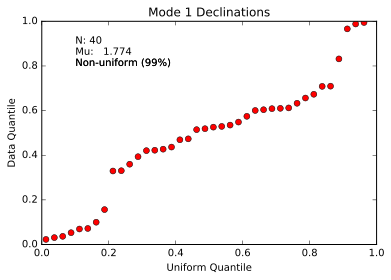

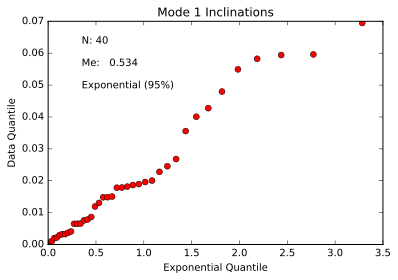

In [17]:
# Test whether new SLB data qualifies as a Fisherian distribution
ipmag.fishqq(SLB_Data['vgp_lon'].tolist(),SLB_Data['vgp_lat'].tolist())

When the two populations are grouped, the combined SLB data fail the Fisher quantile-quantile test above. Possible explanations for this non-Fisherian distribution are explored below.
### VGP populations from new SLB data
#### *Rapid multiple-eruption episodes that are causing excursional behavior to be overrepresented in the dataset*
This explanation would likely predict that the more southerly VGPs are excursional and therefore stratigraphically grouped. However, approaching the problem from a stratigraphic standpoint reveals that the low latitude VGPs are encountered in multiple parts of the stratigraphic succession. Since these VGPS are coming from flows throughout SLB stratigraphy (some sequential flows, others isolated) if the southerly population is excursional it would have needed to be a direction that was returned to repeatedly by the field.
In the stratigraphic column below, the blue arrows mark sampled flows that exhibit low latitude directions, and the red arrows mark sampled flows that exhibit high latitude directions. It is quite clear from this figure that there is no stratigraphic pattern of the anomalous paleomagnetic directions.
![SLB_strat](../data/SLB/plots/SLB_strat.pdf)
Additionally, a broader map view of the stack of lava flows highlights the discontinuity of the two VGP populations.
![SLB_mapbyVGP](../data/SLB/plots/SLB_shadedbyVGPlat.png)

#### *Rock magnetism*
A difference in the magnetic mineralogy of certain flows could indicate a chemical remagnetization representing the local geomagnetic field at a later date leading to the more southerly VGPs. However, the specimens in the two VGP populations encompass the same range of demagnetization behaviors. Therefore a rock magnetic explanation for the divergent directions is not readily apparent within the data. The demagnetization data (averaged by flow) of both high and low latitude VGPs are presented below.

In [18]:
high_lat_sites = SLB_Data_hi_lat.er_site_names.tolist()
low_lat_sites = SLB_Data_low_lat.er_site_names.tolist()

8204  records read from  ../Data/SLB/magic_measurements.txt
SLB01 plotting by:  er_site_name
SLB02 plotting by:  er_site_name
SLB10 plotting by:  er_site_name
SLB11 plotting by:  er_site_name
SLB12 plotting by:  er_site_name
SLB13 plotting by:  er_site_name
SLB14 plotting by:  er_site_name
SLB15 plotting by:  er_site_name
SLB16 plotting by:  er_site_name
SLB29 plotting by:  er_site_name


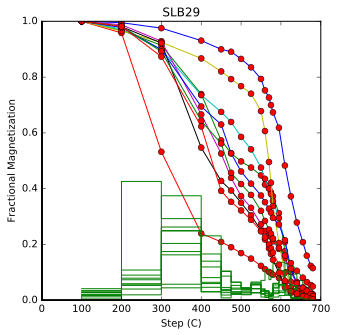

In [19]:
ipmag.demag_magic('../Data/SLB/', plot_by='site', treat='T', 
                  individual=low_lat_sites,average_measurements=True, 
                  single_plot=True)

8204  records read from  ../Data/SLB/magic_measurements.txt
SLB03 plotting by:  er_site_name
SLB04 plotting by:  er_site_name
SLB05 plotting by:  er_site_name
SLB06 plotting by:  er_site_name
SLB07 plotting by:  er_site_name
SLB08 plotting by:  er_site_name
SLB09 plotting by:  er_site_name
SLB17 plotting by:  er_site_name
SLB18 plotting by:  er_site_name
SLB19 plotting by:  er_site_name
SLB20 plotting by:  er_site_name
SLB21 plotting by:  er_site_name
SLB22 plotting by:  er_site_name
SLB23 plotting by:  er_site_name
SLB24 plotting by:  er_site_name
SLB25 plotting by:  er_site_name
SLB26 plotting by:  er_site_name
SLB27 plotting by:  er_site_name
SLB28 plotting by:  er_site_name
SLB30 plotting by:  er_site_name
SLB31 plotting by:  er_site_name
SLB32 plotting by:  er_site_name
SLB33 plotting by:  er_site_name
SLB34 plotting by:  er_site_name
SLB35 plotting by:  er_site_name
SLB36 plotting by:  er_site_name
SLB37 plotting by:  er_site_name
SLB38 plotting by:  er_site_name
SLB39 plotting b

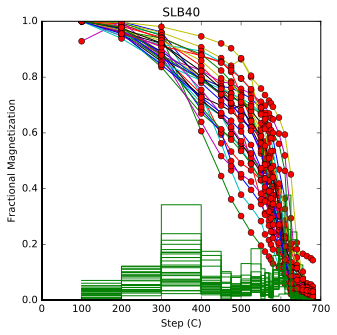

In [21]:
ipmag.demag_magic('../Data/SLB/', plot_by='site', treat='T', 
                  individual=high_lat_sites, average_measurements=True, 
                  single_plot=True)

#### *Patterns in the distribution and/or secular variation of poles*
Considered individually, both VGP populations are Fisher-distributed.

{'Dec': 189.87618031371633,
 'Inc': 9.225749891843499,
 'Me': 0.77027561013556023,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 0.93893808899861431,
 'Mu_critical': 1.207,
 'N': 10,
 'Test_result': 'consistent with Fisherian model'}

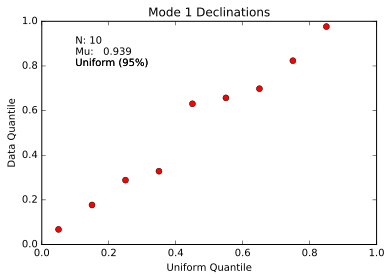

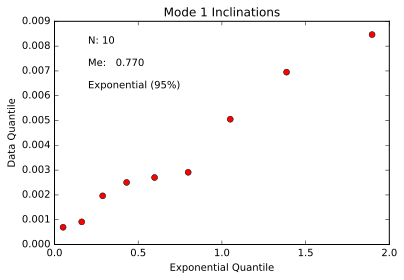

In [22]:
ipmag.fishqq(SLB_Data_low_lat['vgp_lon'].tolist(),SLB_Data_low_lat['vgp_lat'].tolist())

{'Dec': 189.43399983176758,
 'Inc': 32.306644938683029,
 'Me': 1.1071268307909761,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 0.60645097771482315,
 'Mu_critical': 1.207,
 'N': 30,
 'Test_result': 'Fisherian model rejected'}

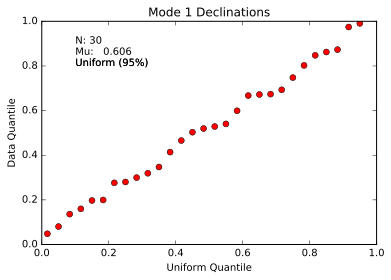

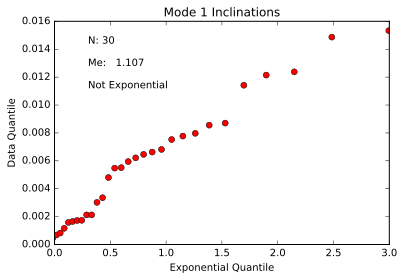

In [23]:
ipmag.fishqq(SLB_Data_hi_lat['vgp_lon'].tolist(),SLB_Data_hi_lat['vgp_lat'].tolist())

One last way to approach this problem is to inspect the path of the paleomagnetic poles being traced out by secular variation. We can look for potential patterns in the path of the poles through time by considering each cooling unit's stratigraphic placement. 

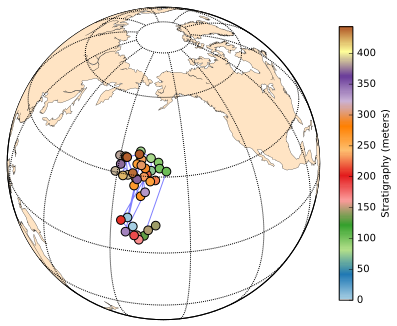

In [24]:
# upload strat heights
SLB_strat_df = pd.read_csv('../Data/SLB/er_sites.txt', sep='\t', skiprows=1, usecols=['er_site_name', 'site_height'])
SLB_strat_df = SLB_strat_df.set_index('er_site_name')
#SLB_strat = SLB_strat_df.to_dict()['site_height']

m = pole_figure_appearance()

# ipmag.plot_vgp(m,NSVG_nswu['pole_lon'].tolist(),NSVG_nswu['pole_lat'].tolist(),
#                color='b',label='NSVG (nswu; Tauxe and Kodama (2009))')
centerlon, centerlat = m(SLB_Data['vgp_lon'].tolist(),SLB_Data['vgp_lat'].tolist())
m.plot(centerlon, centerlat, alpha=0.5, zorder=1)
m.scatter(centerlon, centerlat, marker='.', s=300.0, c = SLB_strat_df.site_height.tolist(), cmap='Paired', zorder=2)
# ipmag.plot_pole_colorbar(m,SLB_Data['vgp_lon'].tolist(),SLB_Data['vgp_lat'].tolist(), 
#                          [5]*len(SLB_Data['vgp_lon'].tolist()), SLB_Data['er_site_names'].tolist(), 'SLB01', 'SLB40')
# ipmag.plot_vgp(m,NSVG_nsl['pole_lon'].tolist(),NSVG_nsl['pole_lat'].tolist(),
#                color='springgreen',label='SLB (nsl; Tauxe and Kodama (2009))')
# ipmag.plot_pole(m,combined_SLB_mean['dec'],combined_SLB_mean['inc'],combined_SLB_mean['alpha95'],
#                 marker='s',color='g')

# ipmag.print_pole_mean(combined_SLB_mean)
plt.colorbar(label='Stratigraphy (meters)', shrink=0.7)
plt.show()

From this view, we notice the relatively tight grouping of poles among certain stratigraphic intervals as they trace out sections of the entire distribution. However, there is still no apparent explanation for the occasional excursion of the geomagnetic pole to lower latitudes. It therefore seems likely that the divergence of these two VGP populations can be attributed to a recurrent geomagnetic excursion rather than a post-emplacement offset of magnetizations. We also note the similarity of this anomalous behavior to the distribution of paleomagnetic poles from the Lake Shore Traps (see below).

## Combine new SLB data with Tauxe and Kodama (2009)

In [25]:
combined_SLB_lon = NSVG_nsl['pole_lon'].tolist() + SLB_Data['vgp_lon'].tolist()
combined_SLB_lat = NSVG_nsl['pole_lat'].tolist() + SLB_Data['vgp_lat'].tolist()
combined_SLB_mean = ipmag.fisher_mean(combined_SLB_lon,combined_SLB_lat)

Plong: 187.8  Plat: 27.1
Number of directions in mean (n): 50
Angular radius of 95% confidence (A_95): 3.0
Precision parameter (k) estimate: 46.5


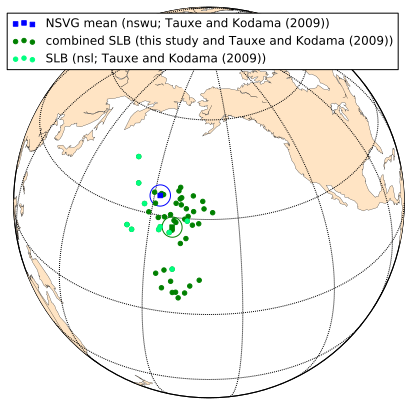

In [26]:
m = pole_figure_appearance()

# ipmag.plot_vgp(m,NSVG_nswu['pole_lon'].tolist(),NSVG_nswu['pole_lat'].tolist(),
#                color='b',label='NSVG (nswu; Tauxe and Kodama (2009))')
ipmag.plot_pole(m,NSVG_nswu_mean['dec'],NSVG_nswu_mean['inc'],NSVG_nswu_mean['alpha95'],
                marker='s',color='b',label='NSVG mean (nswu; Tauxe and Kodama (2009))')
ipmag.plot_vgp(m,combined_SLB_lon,combined_SLB_lat,
               color='g',label='combined SLB (this study and Tauxe and Kodama (2009))')
ipmag.plot_vgp(m,NSVG_nsl['pole_lon'].tolist(),NSVG_nsl['pole_lat'].tolist(),
               color='springgreen',label='SLB (nsl; Tauxe and Kodama (2009))')
ipmag.plot_pole(m,combined_SLB_mean['dec'],combined_SLB_mean['inc'],combined_SLB_mean['alpha95'],
                marker='s',color='g')

ipmag.print_pole_mean(combined_SLB_mean)

plt.legend()
plt.savefig('./Code_output/NSVG_SLB_poles_combined.pdf')
plt.show()

{'Dec': 187.79191234206988,
 'Inc': 27.199685356762615,
 'Me': 0.53556909069644332,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 1.4805683534761531,
 'Mu_critical': 1.207,
 'N': 50,
 'Test_result': 'Fisherian model rejected'}

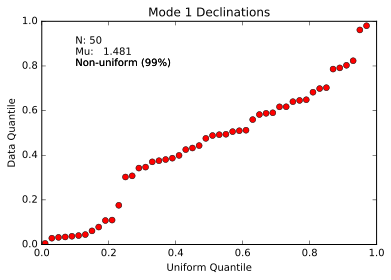

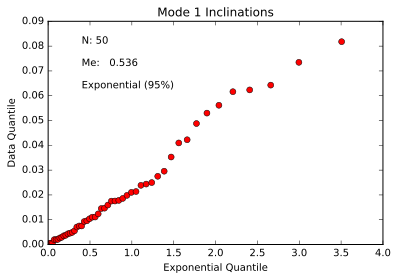

In [27]:
ipmag.fishqq(combined_SLB_lon,combined_SLB_lat)

## Lake Shore Traps

In [28]:
Diehl1994a_LST_Data_all=pd.read_csv('../Data/Previous_studies/Diehl1994a_data.csv',sep=',')
#Kulakov2013 reported data for the flow LST28 that supersedes 
#the Diehl direction which should accordingly be dropped
Diehl1994a_LST_Data=Diehl1994a_LST_Data_all.drop(17)
Diehl1994a_LST_Data.reset_index(inplace=True)
Diehl1994a_LST_Data.head()

index site_ID       study  dec_is  inc_is  dip_direction  dip  dec_tc  \
0      0    LST1  Diehl1994a   281.8    38.5             22   24   301.3   
1      1   LST2   Diehl1994a   283.5    38.0             22   24   302.5   
2      2    LST3  Diehl1994a   284.1    37.3             22   24   302.5   
3      3   LST4   Diehl1994a   281.9    36.4             22   24   300.1   
4      4   LST5   Diehl1994a   284.8    35.4             22   24   302.0   

   inc_tc  a_95  n  site_lat  site_lon  vgp_lat  vgp_lon  kappa      member  \
0    38.7   3.8  9     47.43    -87.71     36.9    174.8  184.7  Middle LST   
1    37.6   4.8  7     47.43    -87.71     37.1    173.2  162.8  Middle LST   
2    36.7   2.4  7     47.43    -87.71     36.7    172.6  620.2  Middle LST   
3    36.8   2.1  8     47.43    -87.71     35.2    174.6  681.1  Middle LST   
4    34.8   2.4  7     47.43    -87.71     35.5    171.9  630.0  Middle LST   

        location  
0  Eastern sites  
1  Eastern sites  
2  Eastern sites  
3  Eastern sites  
4  Eastern sites

In [29]:
Kulakov2013a_LST_Data=pd.read_csv('../Data/Previous_studies/Kulakov2013a_data.csv',sep=',')
Kulakov2013a_LST_Data.head()

site_ID         study  dec_is  inc_is  dip_direction  dip  dec_tc  inc_tc  \
0     CS1  Kulakov2013a   267.9    46.8            356   38   300.3    34.1   
1     CS2  Kulakov2013a   261.1    47.2            356   38   297.0    37.9   
2     SI1  Kulakov2013a   239.2    43.5            356   38   280.4    48.1   
3     SI2  Kulakov2013a   237.2    37.8            356   38   272.4    45.8   
4     SI3  Kulakov2013a   243.9    40.5            356   38   279.9    43.5   

   a_95  directional_kappa  n  site_lat  site_lon  vgp_lat  vgp_lon  \
0   3.8                240  9     47.46    -88.07     34.0    172.5   
1   2.7                803  6     47.46    -88.07     33.6    177.4   
2   3.0                185  9     47.46    -88.07     27.7    195.8   
3   5.0                163  6     47.46    -88.07     21.2    199.5   
4   4.0                620  6     47.46    -88.07     24.9    193.1   

       member                  location  
0  Middle LST  Coast near Silver Island  
1  Middle LST  Coast near Silver Island  
2  Middle LST             Silver Island  
3  Middle LST             Silver Island  
4  Middle LST             Silver Island

In [30]:
LST_Diehl_VGPs=ipmag.make_di_block(Diehl1994a_LST_Data['vgp_lon'],
                                   Diehl1994a_LST_Data['vgp_lat'])

LST_Kulakov_VGPs=ipmag.make_di_block(Kulakov2013a_LST_Data['vgp_lon'],
                                     Kulakov2013a_LST_Data['vgp_lat'])

LST_VGPs=np.concatenate((LST_Diehl_VGPs,LST_Kulakov_VGPs))

LST_Diehl_mean = pmag.fisher_mean(LST_Diehl_VGPs)
LST_Kulakov_mean=pmag.fisher_mean(LST_Kulakov_VGPs)
LST_all_mean=pmag.fisher_mean(LST_VGPs)

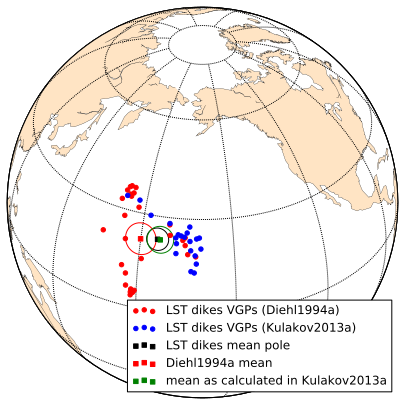

In [31]:
m = Basemap(projection='ortho',lat_0=35,lon_0=200,resolution='c',area_thresh=50000)
pole_figure_appearance()

ipmag.plot_vgp(m,Diehl1994a_LST_Data['vgp_lon'].tolist(),
               Diehl1994a_LST_Data['vgp_lat'].tolist(),
              label='LST dikes VGPs (Diehl1994a)',color='r')
ipmag.plot_vgp(m,Kulakov2013a_LST_Data['vgp_lon'].tolist(),
               Kulakov2013a_LST_Data['vgp_lat'].tolist(),
              label='LST dikes VGPs (Kulakov2013a)',color='b')
ipmag.plot_pole(m,LST_all_mean['dec'],LST_all_mean['inc'],LST_all_mean['alpha95'],
               label='LST dikes mean pole',marker='s')
ipmag.plot_pole(m,LST_Diehl_mean['dec'],LST_Diehl_mean['inc'],LST_Diehl_mean['alpha95'],
               color='r',label='Diehl1994a mean',marker='s')
#from Kulakov2013a "23.1°N, 186.4°E (95% confidence for the paleomagnetic pole, 􏰍95 = 4.0°; N = 31)"
ipmag.plot_pole(m,186.4,23.1,4.0,color='g',label='mean as calculated in Kulakov2013a',marker='s')


# ipmag.plot_vgp(m,SLB_Data['vgp_lon'].tolist(),SLB_Data['vgp_lat'].tolist(),
#                label='SLB VGPs',color='pink')

#plt.title('LST VGPs and mean')
plt.legend(loc=4)
plt.savefig('Code_output/LST_vgps.pdf')
plt.show()

Here we test whether the distribution of Lake Shore Traps VGPs are Fisherian. 

{'Dec': 185.61848690207148,
 'Inc': 23.207239038463833,
 'Me': 1.1080580586218494,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 1.8795789739707827,
 'Mu_critical': 1.207,
 'N': 49,
 'Test_result': 'Fisherian model rejected'}

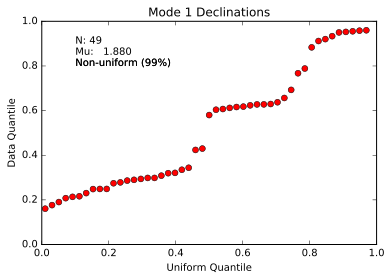

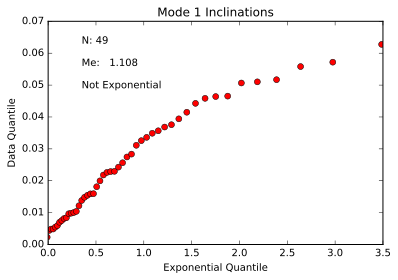

In [32]:
ipmag.fishqq(di_block=LST_VGPs)

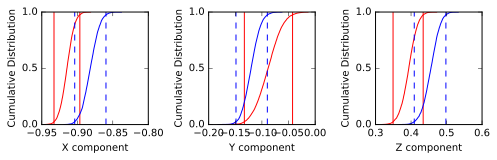

In [33]:
ipmag.common_mean_bootstrap(LST_VGPs,ipmag.make_di_block(combined_SLB_lon,combined_SLB_lat))

Results of Watson V test: 

Watson's V:           6.0
Critical value of V:  6.0
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 4.4
Critical angle for M&M1990:   4.4



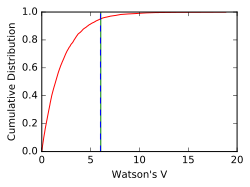

In [35]:
ipmag.common_mean_watson(LST_VGPs,ipmag.make_di_block(combined_SLB_lon,combined_SLB_lat), plot='yes')

## Michipicoten Island

### Palmer and Davis (1987) data

In [36]:
Palmer1987_data=pd.read_csv('../Data/Previous_studies/Palmer1987a_data_combined_sites.csv')
ipmag.vgp_calc(Palmer1987_data)

The code below splits this dataframe into sites from older main stage basalts that have been correlated to the Mamainse Point Formation, sites from the instrusive suite, and sites from the Michipicoten Island Formation.

While not explicitly described as such, it appears that each of the sites sampled in Palmer and Davis (1987) are treated as single cooling units except for site 'KM' which is decribed as being collected over a stratigraphic interval containing multiple flows. As the site is not from a single cooling unit, data from this are excluded. Also, site 18 is described as coming from a fault bound block with anomalous steep dip where a structural attitude could not be determined and should be excluded.

Palmer and Davis (1987) sampled the Channel Lake Member, the Cuesta Member, and the Davieaux Island Member at multiple sites from which VGPs were found and used in the final calculation of the Michipicoten Island Formation mean paleomagnetic pole. However, field observations reveal that some of these sites represented the redundant sampling of a single cooling unit, meaning that several VGPs that were originally treated as independent should have been combined with one another in the final calculation. Here we reduce the Palmer and Davis (1987) data set to satisfy these concerns. The reduced number of sites for each Michipicoten Island Formation member is shown below.

In [37]:
print 'Number of Cuesta Member flows: ', len(Palmer1987_data.loc[Palmer1987_data['member']=='Cuesta_Member'])
print 'Number of Channel Lake Member flows: ', len(Palmer1987_data.loc[Palmer1987_data['member']=='Channel_Lake_Member'])
print 'Number of Quebec Harbour Member flows: ', len(Palmer1987_data.loc[Palmer1987_data['member']=='Quebec_Harbour_Member'])
print 'Number of South Shore Member flows: ', len(Palmer1987_data.loc[Palmer1987_data['member']=='South_Shore_Member'])
print 'Number of Davieaux Island Member flows: ', len(Palmer1987_data.loc[Palmer1987_data['member']=='Davieaux_Island_Member'])
print 'Total number of cooling units from the Michipicoten Island Formation: ',len(Palmer1987_data.loc[Palmer1987_data['formation']=='Michipicoten_Island'])

Number of Cuesta Member flows:  2
Number of Channel Lake Member flows:  1
Number of Quebec Harbour Member flows:  1
Number of South Shore Member flows:  3
Number of Davieaux Island Member flows:  1
Total number of cooling units from the Michipicoten Island Formation:  8


Michipicoten Island Mamainse Formation mean:
Plong: 185.6  Plat: 36.9
Number of directions in mean (n): 7
Angular radius of 95% confidence (A_95): 13.4
Precision parameter (k) estimate: 21.2

Michipicoten Island instrusions mean:
Plong: 165.7  Plat: 23.9
Number of directions in mean (n): 3
Angular radius of 95% confidence (A_95): 22.5
Precision parameter (k) estimate: 31.2

Michipicoten Island Formation mean:
Plong: 174.9  Plat: 25.5
Number of directions in mean (n): 8
Angular radius of 95% confidence (A_95): 7.7
Precision parameter (k) estimate: 53.2


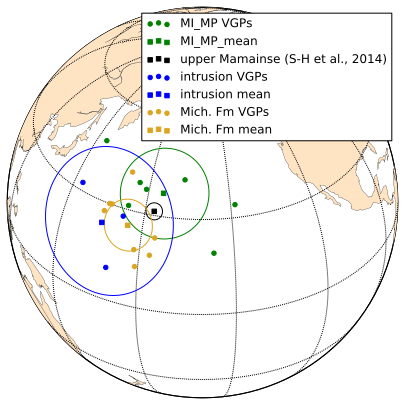

In [38]:
MI_Mamainse_Fm=Palmer1987_data.ix[Palmer1987_data['formation'] == 'Quebec_Mine']
MI_Mamainse_Fm.reset_index(inplace=True, drop=True)
#make dataframe that excludes sites 18 and KM and reset the index of the dataframe
#MI_Mamainse_Fm=MI_Mamainse_Fm_all.drop([1,8])
MI_Mamainse_Fm.reset_index(inplace=True)
MI_Mamainse_Fm_VGPs = ipmag.make_di_block(MI_Mamainse_Fm['vgp_lon'],MI_Mamainse_Fm['vgp_lat'])
MI_Mamainse_Fm_mean = pmag.fisher_mean(MI_Mamainse_Fm_VGPs)
print 'Michipicoten Island Mamainse Formation mean:'
ipmag.print_pole_mean(MI_Mamainse_Fm_mean)

MI_intrusions=Palmer1987_data.ix[Palmer1987_data['formation'] == 'intrusive']
MI_intrusions.reset_index(inplace=True, drop=True)
MI_intrusions_VGPs = ipmag.make_di_block(MI_intrusions['vgp_lon'],MI_intrusions['vgp_lat'])
MI_intrusions_mean = pmag.fisher_mean(MI_intrusions_VGPs)
print '\nMichipicoten Island instrusions mean:'
ipmag.print_pole_mean(MI_intrusions_mean)

Michipicoten_Island_Fm=Palmer1987_data.ix[Palmer1987_data['formation'] == 'Michipicoten_Island']
Michipicoten_Island_Fm.reset_index(inplace=True, drop=True)
Michipicoten_Island_Fm_VGPs = ipmag.make_di_block(Michipicoten_Island_Fm['vgp_lon'],Michipicoten_Island_Fm['vgp_lat'])
Michipicoten_Island_Fm_mean = pmag.fisher_mean(Michipicoten_Island_Fm_VGPs)
print '\nMichipicoten Island Formation mean:'
ipmag.print_pole_mean(Michipicoten_Island_Fm_mean)

m = pole_figure_appearance()

ipmag.plot_vgp(m,MI_Mamainse_Fm['vgp_lon'].tolist(),MI_Mamainse_Fm['vgp_lat'].tolist(),
               label='MI_MP VGPs',color='g')
ipmag.plot_pole(m,MI_Mamainse_Fm_mean['dec'],MI_Mamainse_Fm_mean['inc'],MI_Mamainse_Fm_mean['alpha95'],
                label='MI_MP_mean',marker='s',color='g')
ipmag.plot_pole(m,183.2,31.2,2.5,label='upper Mamainse (S-H et al., 2014)',marker='s')

ipmag.plot_vgp(m,MI_intrusions['vgp_lon'].tolist(),MI_intrusions['vgp_lat'].tolist(),
               label='intrusion VGPs',color='blue')
ipmag.plot_pole(m,MI_intrusions_mean['dec'],MI_intrusions_mean['inc'],MI_intrusions_mean['alpha95'],
                label='intrusion mean',marker='s',color='blue')

ipmag.plot_vgp(m,Michipicoten_Island_Fm['vgp_lon'].tolist(),
               Michipicoten_Island_Fm['vgp_lat'].tolist(),
               label='Mich. Fm VGPs',color='goldenrod')
ipmag.plot_pole(m,Michipicoten_Island_Fm_mean['dec'],Michipicoten_Island_Fm_mean['inc'],
                Michipicoten_Island_Fm_mean['alpha95'],
                label='Mich. Fm mean',marker='s',color='goldenrod')
plt.legend()
plt.show()

In [39]:
Michipicoten_Island_Fm

study           site      dec_tc     inc_tc        a95   n  site_lat  \
0  Palmer1987       1 and 24  302.000000  23.000000  16.000000  11     47.72   
1  Palmer1987      11 and 12  302.764894  21.588111   5.200000   8     47.73   
2  Palmer1987  3, 13, and 25  301.683851  17.014168  29.850000  13     47.71   
3  Palmer1987        2 and 4  307.244661  39.086265  23.000000   9     47.71   
4  Palmer1987             14  283.000000  24.000000   5.600000   5     47.73   
5  Palmer1987              5  286.000000  32.000000   5.100000   5     47.70   
6  Palmer1987             16  283.000000  13.000000  11.200000   4     47.71   
7  Palmer1987      15 and 17  287.078283  19.133917  21.831841   9     47.70   

   site_lon            formation                  member    site_R  \
0    -85.95  Michipicoten_Island           Cuesta_Member  1.990000   
1    -85.62  Michipicoten_Island           Cuesta_Member  1.813883   
2    -85.94  Michipicoten_Island     Channel_Lake_Member  1.927198   
3    -85.94  Michipicoten_Island   Quebec_Harbour_Member  1.991427   
4    -85.64  Michipicoten_Island      South_Shore_Member  4.979000   
5    -85.85  Michipicoten_Island      South_Shore_Member  4.982000   
6    -85.79  Michipicoten_Island      South_Shore_Member  3.956000   
7    -85.79  Michipicoten_Island  Davieaux_Island_Member  1.992479   

   site_kappa                                            comment  \
0  229.000000  Fisher mean of site means 1 and 24---same flow...   
1    5.372968                Fisher mean of site means 11 and 12   
2   13.735912  Fisher mean of site means 3, 13 and 25---Chann...   
3  116.655000                  Fisher mean of site means 2 and 4   
4  188.000000                                                NaN   
5  224.000000                                                NaN   
6   68.000000                                                NaN   
7  132.958280                Fisher mean of site means 15 and 17   

   paleolatitude    vgp_lat     vgp_lon  vgp_lat_rev  vgp_lon_rev  
0      11.982503  30.155157  167.669185   -30.155157   347.669185  
1      11.191105  30.047371  166.739747   -30.047371   346.739747  
2       8.698827  27.466789  165.507882   -27.466789   345.507882  
3      22.104038  40.970516  171.701143   -40.970516   351.701143  
4      12.550216  17.968086  183.376675   -17.968086     3.376675  
5      17.350615  23.430590  184.531613   -23.430590     4.531613  
6       6.584742  13.603190  179.006565   -13.603190   359.006565  
7       9.841281  18.732965  178.210301   -18.732965   358.210301

### New data from the Michipicoten Island Formation

New paleomagnetic data from the Michipicoten Island Formation are imported below. We first separate data by *in situ* ("geo") and tilt-corrected ("tc") coordinates. We then further separate data by member ("SS" = South Shore Member basalts, "CM" = Cuesta Member andesite).

In [41]:
All_Michi = pd.read_csv('../Data/Michipicoten/pmag_results.txt',sep='\t',skiprows=1)
All_Michi_geo = All_Michi.ix[All_Michi['pole_comp_name'] == 'HT'].ix[All_Michi['tilt_correction']==0]
All_Michi_tc = All_Michi.ix[All_Michi['pole_comp_name'] == 'HT'].ix[All_Michi['tilt_correction']==100]
All_Michi_tc.reset_index(inplace=True, drop=True)
All_Michi_geo.reset_index(inplace=True, drop=True)

In [42]:
SS_final = All_Michi.ix[All_Michi['er_site_names'].str.startswith('SS')]
SS_final_tc = All_Michi_tc.ix[All_Michi_tc['er_site_names'].str.startswith('SS')]
SS_final_geo = All_Michi_geo.ix[All_Michi_geo['er_site_names'].str.startswith('SS')]
SS_final_tc.head()

average_age  average_age_sigma average_age_unit  average_alpha95  \
2       1083.5                0.5               Ma              3.8   
3       1083.5                0.5               Ma              3.6   
4       1083.5                0.5               Ma              3.1   
5       1083.5                0.5               Ma             12.4   
6       1083.5                0.5               Ma              8.5   

   average_dec  average_inc  average_k  average_lat  average_lon  average_n  \
2        273.0          0.6      219.0      47.7239     -85.6483          8   
3        296.4         -2.5      239.0      47.7233     -85.6489          8   
4        297.2         -0.7      312.0      47.7238     -85.6495          8   
5        291.9          9.3       18.0      47.7244     -85.6506          9   
6        302.0         21.3       51.0      47.7242     -85.6508          7   

   ...   pmag_criteria_codes  pmag_result_name  pole_comp_name  \
2  ...                ACCEPT     VGP Site: SS1              HT   
3  ...                ACCEPT    VGP Site: SS10              HT   
4  ...                ACCEPT    VGP Site: SS11              HT   
5  ...                ACCEPT    VGP Site: SS12              HT   
6  ...                ACCEPT    VGP Site: SS13              HT   

                           result_description  tilt_correction vgp_dm vgp_dp  \
2  Site VGP, coord system = 100 component: LT              100    2.6    5.0   
3  Site VGP, coord system = 100 component: LT              100    2.4    4.8   
4  Site VGP, coord system = 100 component: LT              100    2.1    4.1   
5  Site VGP, coord system = 100 component: LT              100    8.5   16.4   
6  Site VGP, coord system = 100 component: LT              100    6.1   11.2   

  vgp_lat vgp_lon vgp_n  
2     2.2   182.3     8  
3    16.4   163.4     8  
4    17.6   163.3     8  
5    18.1   171.0     9  
6    29.4   167.2     7  

[5 rows x 31 columns]

In [43]:
CM_final_tc = All_Michi_tc.ix[All_Michi_tc['er_site_names'].str.startswith('CM')]
CM_final_tc

average_age  average_age_sigma average_age_unit  average_alpha95  \
0       1083.5                0.5               Ma              6.6   
1       1083.5                0.5               Ma              1.6   

   average_dec  average_inc  average_k  average_lat  average_lon  average_n  \
0        323.8         21.0       71.0       47.723     -85.9522          8   
1        303.8          6.1     1035.0       47.719     -85.9559          9   

   ...   pmag_criteria_codes  pmag_result_name  pole_comp_name  \
0  ...                ACCEPT     VGP Site: CM1              HT   
1  ...                ACCEPT     VGP Site: CM2              HT   

                           result_description  tilt_correction vgp_dm vgp_dp  \
0  Site VGP, coord system = 100 component: LT              100    4.8    8.7   
1  Site VGP, coord system = 100 component: LT              100    1.1    2.1   

  vgp_lat vgp_lon vgp_n  
0    42.3   145.7     8  
1    24.4   159.7     9  

[2 rows x 31 columns]

Paleomagnetic site means of the South Shore basalts are plotted below with the overall mean.

Dec: 287.6  Inc: 10.4
Number of directions in mean (n): 21
Angular radius of 95% confidence (a_95): 5.4
Precision parameter (k) estimate: 35.4


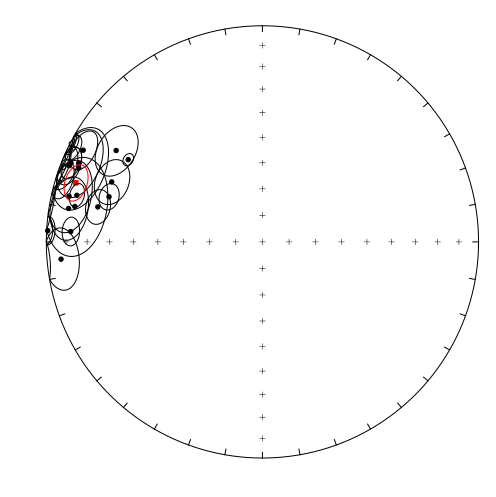

In [44]:
plt.figure(num=1,figsize=(7,7))
ipmag.plot_net(1)

SS_dec = SS_final_tc['average_dec'].tolist()
SS_inc = SS_final_tc['average_inc'].tolist()
SS_a95 = SS_final_tc['average_alpha95'].tolist()

for i in range(len(SS_dec)):
    ipmag.plot_di_mean(SS_dec[i], SS_inc[i], SS_a95[i])

SS_mean_dir = ipmag.fisher_mean(SS_dec,SS_inc)

ipmag.plot_di_mean(SS_mean_dir['dec'],SS_mean_dir['inc'],SS_mean_dir['alpha95'],marker='s', color='r')
ipmag.print_direction_mean(SS_mean_dir)
plt.savefig('Code_output/All_SS_data.pdf')
plt.show()

A Fisher Q-Q test reveals these data to be consistent with the Fisherian model.

{'Dec': 287.60360855657012,
 'Inc': 10.297033320865525,
 'Me': 0.92123018046225358,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 0.92607542329666181,
 'Mu_critical': 1.207,
 'N': 21,
 'Test_result': 'consistent with Fisherian model'}

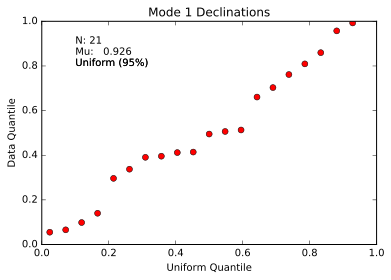

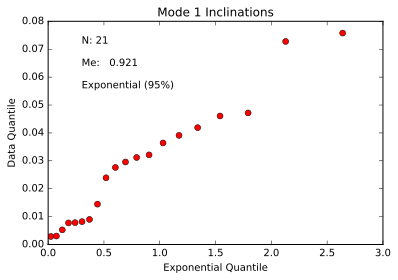

In [45]:
ipmag.fishqq(SS_dec, SS_inc)

The bedding is similar through the South Shore Member such that a fold test is inconclusive (see below). A more complete treatment of our structural analysis of the Michipicoten Island lava flows, including a walkthrough of how we determined tilt-correction for different stratigraphic sections of the South Shore Member, is included within the Data Repository as a separate Jupyter notebook.

In [47]:
# get bedding info
bedding = pd.read_csv('../Data/Michipicoten/er_samples.txt', 
                      sep='\t',skiprows=1, usecols=['er_site_name', 
                                                    'sample_bed_dip', 
                                                    'sample_bed_dip_direction'])

In [48]:
bedding = bedding.drop_duplicates()
bedding = bedding.set_index('er_site_name')

In [49]:
bedding.head()

sample_bed_dip  sample_bed_dip_direction
er_site_name                                          
CM1                     31.8                     171.9
CM2                     25.5                     177.7
SS1                     20.0                     237.6
SS10                    20.0                     237.6
SS11                    20.0                     237.6

In [50]:
SS_diddd = []

for site in bedding.index:
    if str(site) in SS_final_geo.er_site_names.tolist():
        SS_diddd.append([float(SS_final_geo.loc[SS_final_geo['er_site_names']==str(site)]['average_dec']),
                         float(SS_final_geo.loc[SS_final_geo['er_site_names']==str(site)]['average_inc']),
                         bedding.loc[str(site), 'sample_bed_dip_direction'],bedding.loc[str(site), 'sample_bed_dip']])

doing  1000  iterations...please be patient.....


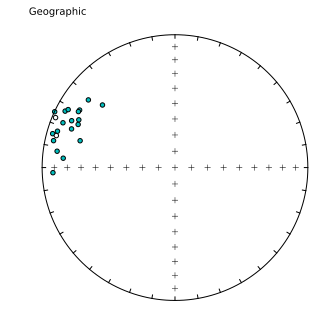

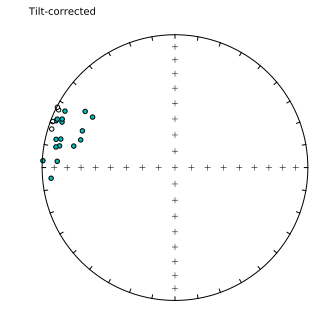

KeyboardInterrupt: 

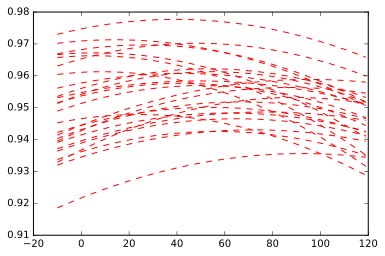

In [51]:
ipmag.bootstrap_fold_test(np.array(SS_diddd))

Paleomagnetic site means of the Cuesta Member andesite are plotted below. Only two Cuesta Member flows were identified in the field, so a Cuesta Member mean would not have much significance.

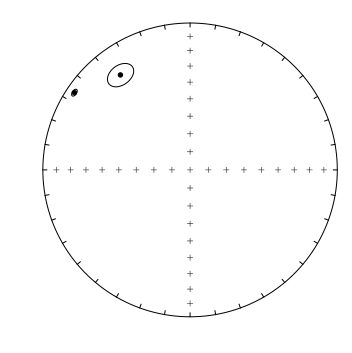

In [52]:
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)

CM_dec = CM_final_tc['average_dec'].tolist()
CM_inc = CM_final_tc['average_inc'].tolist()
CM_a95 = CM_final_tc['average_alpha95'].tolist()

for i in range(len(CM_dec)):
    ipmag.plot_di_mean(CM_dec[i], CM_inc[i], CM_a95[i])

CM_mean_dir = ipmag.fisher_mean(CM_dec,CM_inc)

#ipmag.plot_di_mean(CM_mean_dir['dec'],CM_mean_dir['inc'],CM_mean_dir['alpha95'],marker='s', color='r')

plt.show()

## Combine new Michipicoten data with Palmer and Davis (1987)

Given that we have obtained U-Pb dates for the West Sand Bay tuff and the Davieaux Island Member rhyolite, we are interested in generating a pole that is bracketed by these dates. The units between and including these dates are the West Sand Bay Member, the Quebec Harbor Member, the East Sand Bay Member, the South Shore Member and the Davieaux Island Member. Therefore we combine our data from the South Shore Member with the Quebec Harbour Member and Davieaux Island Member data from Palmer and Davis (1987).

In [53]:
Michipicoten_Island_Fm.iloc[[3,7], :]

study       site      dec_tc     inc_tc        a95  n  site_lat  \
3  Palmer1987    2 and 4  307.244661  39.086265  23.000000  9     47.71   
7  Palmer1987  15 and 17  287.078283  19.133917  21.831841  9     47.70   

   site_lon            formation                  member    site_R  \
3    -85.94  Michipicoten_Island   Quebec_Harbour_Member  1.991427   
7    -85.79  Michipicoten_Island  Davieaux_Island_Member  1.992479   

   site_kappa                              comment  paleolatitude    vgp_lat  \
3   116.65500    Fisher mean of site means 2 and 4      22.104038  40.970516   
7   132.95828  Fisher mean of site means 15 and 17       9.841281  18.732965   

      vgp_lon  vgp_lat_rev  vgp_lon_rev  
3  171.701143   -40.970516   351.701143  
7  178.210301   -18.732965   358.210301

In [54]:
Palmer_data_trimmed = Michipicoten_Island_Fm.iloc[[3,7], :]
combined_Michi_lon = Palmer_data_trimmed['vgp_lon'].tolist() + SS_final_tc['vgp_lon'].tolist()
combined_Michi_lat = Palmer_data_trimmed['vgp_lat'].tolist() + SS_final_tc['vgp_lat'].tolist()
combined_Michi_mean = ipmag.fisher_mean(combined_Michi_lon,combined_Michi_lat)

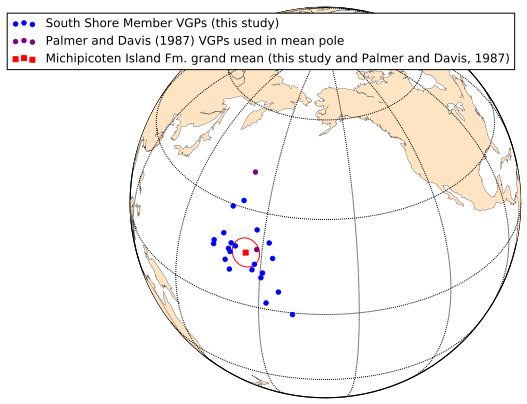

South Shore Member pole: 
Plong: 174.7  Plat: 15.8
Number of directions in mean (n): 21
Angular radius of 95% confidence (A_95): 4.3
Precision parameter (k) estimate: 55.4

Grand mean: 
Plong: 174.7  Plat: 17.0
Number of directions in mean (n): 23
Angular radius of 95% confidence (A_95): 4.4
Precision parameter (k) estimate: 48.4


In [55]:
SS_final_mean = ipmag.fisher_mean(SS_final_tc['vgp_lon'].tolist(),SS_final_tc['vgp_lat'].tolist())

m = pole_figure_appearance()

#ipmag.plot_pole(m,Michipicoten_Island_Fm_mean['dec'],Michipicoten_Island_Fm_mean['inc'],
#                Michipicoten_Island_Fm_mean['alpha95'],
#                label='Mich. Fm mean as calculated by Palmer and Davis (1987)',marker='s',color='goldenrod')

ipmag.plot_vgp(m,SS_final_tc['vgp_lon'].tolist(),SS_final_tc['vgp_lat'].tolist(),
               label='South Shore Member VGPs (this study)',color='b')
#ipmag.plot_pole(m,SS_final_mean['dec'],SS_final_mean['inc'],SS_final_mean['alpha95'],
#                label='South Shore Member mean (this study)',marker='s',color='b')

ipmag.plot_vgp(m,Palmer_data_trimmed['vgp_lon'].tolist(),
               Palmer_data_trimmed['vgp_lat'].tolist(),
               label='Palmer and Davis (1987) VGPs used in mean pole',color='purple')

ipmag.plot_pole(m,combined_Michi_mean['dec'],combined_Michi_mean['inc'],combined_Michi_mean['alpha95'],
                label='Michipicoten Island Fm. grand mean (this study and Palmer and Davis, 1987)',marker='s',markersize=25, color='red')

plt.legend()
plt.savefig('Code_output/Michi_VGPs.pdf')
plt.show()

print "South Shore Member pole: "
ipmag.print_pole_mean(SS_final_mean)

print "\nGrand mean: "
ipmag.print_pole_mean(combined_Michi_mean)

{'Dec': 174.68056363405637,
 'Inc': 16.974664865055974,
 'Me': 0.8235241344357922,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 1.1041506813063025,
 'Mu_critical': 1.207,
 'N': 23,
 'Test_result': 'consistent with Fisherian model'}

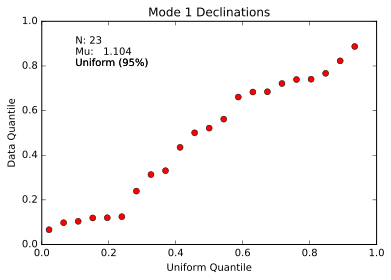

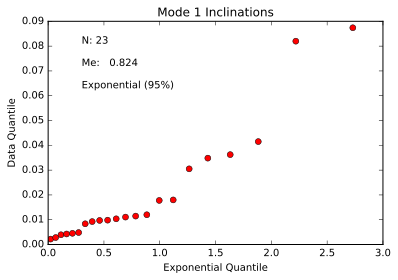

In [56]:
ipmag.fishqq(combined_Michi_lon,combined_Michi_lat)

## Paleogeography of Laurentia
### Late Rift Poles Compilation

Here we compile selected paleomagnetic poles of the Keweenawan Track and add our newly developed data. This section of the code integrates the functionality of the GPlates software for our paleogeographic reconstruction of Laurentia. The ```pygplates``` package is a dependecy of the following code blocks and is imported below. If you wish to render this notebook interactively, the ```pygplates``` package can be downloaded from the GPlates website: http://www.gplates.org/download.html

In [57]:
import pygplates

In [65]:
# 1080 Ma = Nonesuch pole in recon, 1070 Ma = Freda pole, 1050 = Jacobsville
for reconstruction_time in [1109, 1105, 1100, 1097, 1090, 1083, 1080, 1070, 1050]:
    rotation_model = pygplates.RotationModel('../Data/Reconstruction/Late_Rift_recon.rot')
    plate = pygplates.FeatureCollection('../Data/Reconstruction/1000_Laurentia.gpml')
    plate_outline = pygplates.FeatureCollection('../Data/Reconstruction/1000_Laurentia2.gpml')
    export_filename = './Code_output/Reconstructions/reconstructed_{0}Ma.shp'.format(reconstruction_time)
    export_outline_filename = './Code_output/Reconstructions/reconstructed_outline_{0}Ma.shp'.format(reconstruction_time)
    pygplates.reconstruct(plate, rotation_model, export_filename, reconstruction_time)
    pygplates.reconstruct(plate_outline, rotation_model, export_outline_filename, reconstruction_time)

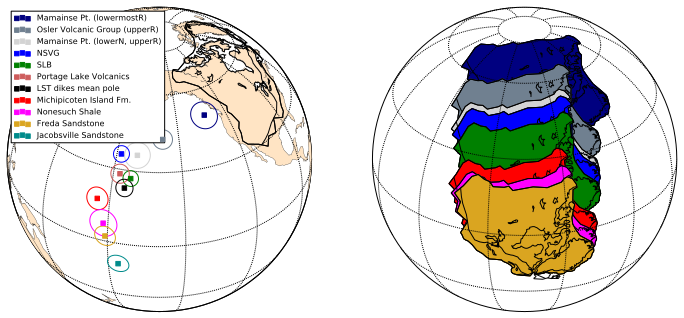

In [67]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
m = Basemap(projection='ortho',lat_0=35,lon_0=200,resolution='c',area_thresh=50000)
ax1.set_aspect(30, adjustable='box')
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white')
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
m.readshapefile('../Data/Reconstruction/Laurentia', 'Laurentia', linewidth=1)
# Swanson-Hysell et al., 2014a -- 1100 Ma
ipmag.plot_pole(m, 227.0, 49.5, 5.3, marker='s', color='navy', 
                label='Mamainse Pt. (lowermostR)')
# Swanson-Hysell et al., 2014b -- 1105 Ma
ipmag.plot_pole(m, -158.3, 42.5, 3.7, marker='s', color='slategrey', 
                label='Osler Volcanic Group (upperR)')
# Swanson-Hysell et al., 2014a -- 1100 Ma
ipmag.plot_pole(m, -170.3, 36.1, 4.9, marker='s', color='lightgray', 
                label='Mamainse Pt. (lowerN, upperR)')
# Tauxe and Kodama (2009) -- 1097 Ma
ipmag.plot_pole(m,NSVG_nswu_mean['dec'],NSVG_nswu_mean['inc'],NSVG_nswu_mean['alpha95'],
                marker='s',color='b',label='NSVG')
# this study + Tauxe and Kodama (2009) -- 1090 Ma
ipmag.plot_pole(m,combined_SLB_mean['dec'],combined_SLB_mean['inc'],combined_SLB_mean['alpha95'],
                marker='s',color='g',label='SLB')
# Kulakov (2014) -- 1093 Ma
ipmag.plot_pole(m, 182.9, 28.3, 3.6, marker='s', color='indianred', label='Portage Lake Volcanics')
# Kulakov et al. (2013)
ipmag.plot_pole(m,LST_all_mean['dec'],LST_all_mean['inc'],LST_all_mean['alpha95'],
               label='LST dikes mean pole',marker='s')
# this study + Palmer and Davis (1987) -- 1083 Ma
ipmag.plot_pole(m,combined_Michi_mean['dec'],combined_Michi_mean['inc'],combined_Michi_mean['alpha95'],
                label='Michipicoten Island Fm.',marker='s', color='red')
# Henry et al. (1977)
ipmag.plot_pole(m, 178.1, 7.6, 5.5, label='Nonesuch Shale',
                marker='s', color='magenta')
# Henry et al. (1977)
ipmag.plot_pole(m, 179, 2.2, 4.2,label='Freda Sandstone', 
                marker='s', color='goldenrod')
# Roy et al. (1978)
ipmag.plot_pole(m, 184, -10, 4.2,label='Jacobsville Sandstone', 
                marker='s', color='darkcyan')

ax1.legend(fontsize=8, loc='upper left')

ax2 = fig.add_subplot(122)
m = Basemap(projection='ortho', lat_0=30, lon_0=-16)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
m.readshapefile('./Code_output/Reconstructions/reconstructed_outline_{0}Ma'.format(1109),'Mamainse_lowermost', color='navy', linewidth=1)
patches   = []
for info, shape in zip(m.Mamainse_lowermost_info, m.Mamainse_lowermost):
    patches.append( Polygon(np.array(shape), True) )
ax2.add_collection(PatchCollection(patches, facecolor= 'navy', edgecolor='k', linewidths=1., zorder=2))
m.readshapefile('./Code_output/Reconstructions/reconstructed_{0}Ma'.format(1109),'Mamainse_lowermost', color='k', linewidth=1)
m.readshapefile('./Code_output/Reconstructions/reconstructed_outline_{0}Ma'.format(1105),'Osler_outline', color='slategrey', linewidth=1)
patches   = []
for info, shape in zip(m.Osler_outline_info, m.Osler_outline):
    patches.append( Polygon(np.array(shape), True) )
ax2.add_collection(PatchCollection(patches, facecolor= 'slategrey', edgecolor='k', linewidths=1., zorder=2))
m.readshapefile('./Code_output/Reconstructions/reconstructed_{0}Ma'.format(1105),'Osler', color='k', linewidth=1)
m.readshapefile('./Code_output/Reconstructions/reconstructed_outline_{0}Ma'.format(1100),'Mamainse', color='lightgray', linewidth=1)
patches   = []
for info, shape in zip(m.Mamainse_info, m.Mamainse):
    patches.append( Polygon(np.array(shape), True) )
ax2.add_collection(PatchCollection(patches, facecolor= 'lightgray', edgecolor='k', linewidths=1., zorder=2))
m.readshapefile('./Code_output/Reconstructions/reconstructed_{0}Ma'.format(1100),'Mamainse', color='k', linewidth=1)
m.readshapefile('./Code_output/Reconstructions/reconstructed_outline_{0}Ma'.format(1097),'NSVG', color='b', linewidth=1)
patches = []
for info, shape in zip(m.NSVG_info, m.NSVG):
    patches.append( Polygon(np.array(shape), True) )
ax2.add_collection(PatchCollection(patches, facecolor= 'b', edgecolor='k', linewidths=1., zorder=2))
m.readshapefile('./Code_output/Reconstructions/reconstructed_{0}Ma'.format(1097),'NSVG', color='k', linewidth=1)
m.readshapefile('./Code_output/Reconstructions/reconstructed_outline_{0}Ma'.format(1090),'SLB', color='g', linewidth=1)
patches = []
for info, shape in zip(m.SLB_info, m.SLB):
    patches.append( Polygon(np.array(shape), True) )
ax2.add_collection(PatchCollection(patches, facecolor= 'g', edgecolor='k', linewidths=1., zorder=2))
m.readshapefile('./Code_output/Reconstructions/reconstructed_{0}Ma'.format(1090),'SLB', color='k', linewidth=1)
m.readshapefile('./Code_output/Reconstructions/reconstructed_outline_{0}Ma'.format(1083),'Michipicoten', color='r', linewidth=1)
patches = []
for info, shape in zip(m.Michipicoten_info, m.Michipicoten):
    patches.append( Polygon(np.array(shape), True) )
ax2.add_collection(PatchCollection(patches, facecolor= 'r', edgecolor='k', linewidths=1., zorder=2))
m.readshapefile('./Code_output/Reconstructions/reconstructed_{0}Ma'.format(1083),'Michipicoten', color='k', linewidth=1)
m.readshapefile('./Code_output/Reconstructions/reconstructed_outline_{0}Ma'.format(1080),'Nonesuch', color='magenta', linewidth=1)
patches = []
for info, shape in zip(m.Nonesuch_info, m.Nonesuch):
    patches.append( Polygon(np.array(shape), True) )
ax2.add_collection(PatchCollection(patches, facecolor= 'magenta', edgecolor='k', linewidths=1., zorder=2))
m.readshapefile('./Code_output/Reconstructions/reconstructed_{0}Ma'.format(1080),'Nonesuch', color='k', linewidth=1)
m.readshapefile('./Code_output/Reconstructions/reconstructed_outline_{0}Ma'.format(1070),'Freda', color='goldenrod', linewidth=1)
patches = []
for info, shape in zip(m.Freda_info, m.Freda):
    patches.append( Polygon(np.array(shape), True) )
ax2.add_collection(PatchCollection(patches, facecolor= 'goldenrod', edgecolor='k', linewidths=1., zorder=2))
m.readshapefile('./Code_output/Reconstructions/reconstructed_{0}Ma'.format(1070),'Freda', color='k', linewidth=1)
#plt.savefig('Code_output/poles.pdf')
plt.show()

### Age of Keweenawan sediments
#### *Nonesuch Shale*

There is much evidence to support the deposition of the Nonesuch shale shortly after or perhaps during late stage volcanism in the Midcontinent Rift (see main text). However, the magnetization of this formation cannot be dated as definitively. Symons et al. (2013) suggested that the magnetization of the Nonesuch shale is secondary, likely a product of oxidation and mineralization in the Nonesuch Formation that postdates its deposition and subsequent burial by the Freda sandstone. They dated this magnetization at 1063 $\pm$ 8 Ma by projecting Laurentia's latitudinal rate of motion to the paleolatitude implied by the Nonesuch paleomagnetic pole. Their analysis assumes a rate of motion consistent with the previously hypothesized slowdown of Laurentia during the late stage of rifting (Davis and Green, 1997). However, our results suggest no significant change in Laurentia's motion over this period. Redoing the analysis of Symons et al. (2013) with our revised rate estimates yields an age of Nonesuch shale magnetization of approximately 1078 Ma (see below).

Create a motion path of Laurentia that captures the paleolatitude of Duluth, MN at 5 myr intervals through active rifting (1108-1083 Ma).

In [68]:
# Duluth, MN
SeedPoint = (46.78,-92.1)
MovingPlate = 1000
RelativePlate = 0
times = np.arange(1083,1108,5)

# Create a motion path feature
digitisation_time = 0
seed_points_at_digitisation_time = pygplates.MultiPointOnSphere([SeedPoint]) 
motion_path_feature = pygplates.Feature.create_motion_path(
        seed_points_at_digitisation_time,
        times,
        valid_time=(1110, 1000),
        relative_plate=RelativePlate,
        reconstruction_plate_id = MovingPlate)

# Create the shape of the motion path
reconstruction_time = 1083
reconstructed_motion_paths = []
pygplates.reconstruct(
        motion_path_feature, rotation_model, reconstructed_motion_paths, reconstruction_time,
        reconstruct_type=pygplates.ReconstructType.motion_path)

# get the reconstructed coordinates into numpy arrays
for reconstructed_motion_path in reconstructed_motion_paths:
    trail = reconstructed_motion_path.get_motion_path().to_lat_lon_array()

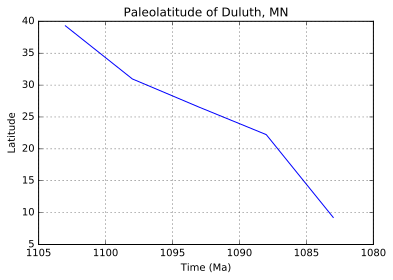

In [71]:
plt.plot(times,np.flipud(trail[:,0]))
plt.title('Paleolatitude of Duluth, MN')
plt.xlabel('Time (Ma)')
plt.ylabel('Latitude')
plt.gca().grid()
plt.gca().invert_xaxis()
plt.show()

The latitudinal change plotted above appears fairly constant. We therefore make a least squares fit to this data below.

In [75]:
m, c = np.linalg.lstsq(np.vstack([times, np.ones(len(times))]).T,np.flipud(trail[:,0]))[0]
print 'Rate of Laurentia\'s latitudinal motion = %0.4f degrees/myr' % (m)
print 'or %0.4f cm/yr' % (m*11.132)

Rate of Laurentia's latitudinal motion = 1.3767 degrees/myr
or 15.3254 cm/yr


Inferred age of Nonesuch Shale if Laurentia
continued moving at the same rate after Midcontinent Rift volcanism ended:
1078.4340 Ma


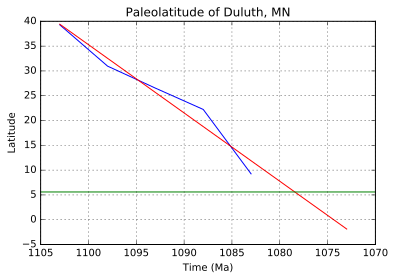

In [77]:
plt.plot(times,np.flipud(trail[:,0]))
times_new = np.arange(1073,1108,5)
plt.plot(times_new, m*times_new + c, 'r')
# Paleolatitude of Nonesuch is 5.6 degrees
plt.plot([1070,1105], [5.6,5.6])
NS_inferred_age = (5.6-c)/m
print 'Inferred age of Nonesuch Shale if Laurentia\n\
continued moving at the same rate after Midcontinent Rift volcanism ended:\n\
%0.4f Ma' % (NS_inferred_age)
plt.title('Paleolatitude of Duluth, MN')
plt.xlabel('Time (Ma)')
plt.ylabel('Latitude')
plt.gca().grid()
plt.gca().invert_xaxis()
plt.show()

#### *Jacobsville Sandstone*

New detrital zircon dates from the Jacobsville sandstone, which unconformably overlies the Freda sandstone, reveal a much younger age for this formation than estimated for the Oronto Group sediments ($<$959 $\pm$ 19 Ma; Malone et al., 2015). The paleolatitude of Laurentia implied by the Neoproterozoic APWP was then matched with that implied by the Jacobsville paleomagnetic pole, yielding a set of possible ages for Jacobsville deposition: ~780-755, ~700-610 or ~570-555 Ma (Malone et al., 2015). Motivations for redoing this analysis with paleomagnetic poles from both the APWP of Laurentia and the APWP of Baltica (hypothesized to have a longstanding connection with Laurentia's northeastern margin throughout the Neoproterozoic; Pisarevsky et al., 2003; Li et al., 2008; Evans, 2009) are outlined in the main text (*Discussion: Age of Keweenawan sediments*).

We first upload paleomagnetic poles of Laurentia as compiled by the Nordic Supercontinent Workshop, Haraldvangen, Norway in 2014. 

In [78]:
Laurentia_poles = pd.read_csv('../Data/Reconstruction/Laurentia_Poles.csv', 
                              usecols=['Formation', 'Terrane', 'AgeUpper', 
                                       'AgeLower', 'AgeNominal', 'A95', 'SLat', 
                                       'SLon', 'PLat', 'PLon', 'RefLat', 'RefLon'])
Laurentia_poles = Laurentia_poles.sort_values(by='AgeNominal', ascending=False)
Laurentia_poles.reset_index(inplace=True, drop=True)
Laurentia_poles

Formation  \
0                             Stillwater Complex - C2   
1                                        MATACHEWAN R   
2                                        MATACHEWAN N   
3                                        Malley dykes   
4                                          SENNETERRE   
5                                        NIPISSING N1   
6                                        Dogrib dykes   
7                                         BISCOTASING   
8                                          MARATHON N   
9                                          MARATHON R   
10                                       CAUCHON LAKE   
11                                       FORT FRANCES   
12                                         LAC ESPRIT   
13                                  Lac de Gras dykes   
14                                              MINTO   
15                                        MOLSON B+C2   
16  MEAN Pearson A/Peninsular sill/Kilohigok basin...   
17                                   Martin Formation   
18                                      Dubawnt Group   
19                                      Cleaver Dykes   
20                        Melville Bugt diabase dykes   
21                            Western Channel Diabase   
22                 St.Francois Mountains Acidic Rocks   
23                      Michikamau Intrusion Combined   
24                                  Spokane Formation   
25                                 Snowslip Formation   
26                    Tobacco Root Dykes - A combined   
27                                       Purcell Lava   
28                     MEAN Rocky Mountain intrusions   
29                                   Mistastin Pluton   
..                                                ...   
61                                   Lake Shore Traps   
62                      Michipicoten Island Formation   
63                                     Nonesuch Shale   
64                                    Freda Sandstone   
65                              Haliburton Intrusions   
66                       Adirondack Highlands Granite   
67                   Adirondack Highlands Anorthosite   
68                        Adirondack Highlands Gneiss   
69      Nankoweap Formation - Grand Canyon Supergroup   
70                                      Wyoming dykes   
71                                    Tsezotene sills   
72                     MEAN Wyoming "Gunbarrel" dykes   
73                           Tsezotene Sills Combined   
74                               Uinta Mountain Group   
75                                         Kwagunt Fm   
76                          Franklin event grand mean   
77                                 Franklin-Natkusiak   
78                            Long Range dykes (Newf)   
79                          Long Range dykes (Labr)     
80                                   Long Range Dykes   
81                                  Grenville dykes B   
82                                       Mutton Bay A   
83                           Baie des Moutons complex   
84                           Baie des Moutons complex   
85                                  Callander syenite   
86                         Callander Alkaline Complex   
87                                   Catoctin Basalts   
88                                         Catoctin A   
89                        Sept-Iles Layered Intrusion   
90                                       Skinner Cove   

                     Terrane  AgeUpper  AgeLower  AgeNominal   A95  SLat  \
0          Laurentia-Wyoming      2709      2701      2705.0   4.0  45.2   
1   Laurentia-Superior(East)      2489      2443      2466.0   1.6  48.0   
2   Laurentia-Superior(East)      2449      2443      2446.0   2.4  48.0   
3            Laurentia-Slave      2233      2229      2231.0   6.7  64.2   
4   Laurentia-Superior(East)      2224      2212      2218.0   6.0  49.0   
5   Laurentia-Superior(East)      2221      2213     

The paleolatitude of Duluth, MN ("RefLat", "RefLon") is then calculated for each of these paleomagnetic poles and plotted below.

In [79]:
Laurentia_poles['Latitude'] = pd.Series(90 - np.rad2deg(np.arccos(np.sin(np.deg2rad(Laurentia_poles['RefLat']))*np.sin(np.deg2rad(Laurentia_poles['PLat']))
                                                  +np.cos(np.deg2rad(Laurentia_poles['RefLat']))*np.cos(np.deg2rad(Laurentia_poles['PLat']))
                                                  *np.cos(np.deg2rad(Laurentia_poles['RefLon']-Laurentia_poles['PLon'])))))

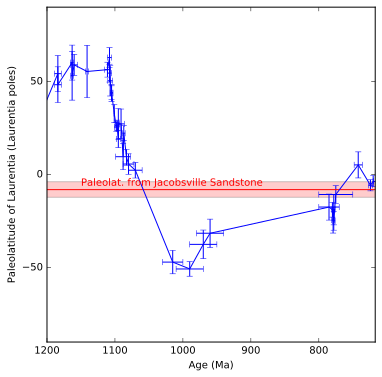

In [80]:
# First we must tweak the format of the pole list
Laurentia_copy = pd.DataFrame(Laurentia_poles, columns=['PLat','PLon'])
Laurentia_copy = Laurentia_copy.rename_axis({'PLat':'PLat_rot', 'PLon':'PLon_rot'}, axis='columns')
Laurentia_poles['PLat_rot'] = Laurentia_copy.PLat_rot
Laurentia_poles['PLon_rot'] = Laurentia_copy.PLon_rot
Laurentia_poles['AgeNominal_neg'] = Laurentia_poles.AgeNominal.apply(np.negative)

# Plot the paleolatitude of Duluth using Laurentia poles
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
ax1.add_patch(mpatch.Rectangle((1300, -12.2), -1000, 8.4, facecolor='r', alpha=0.2))
ax1.plot([-8.1]*2000, 'r-')
ax1.errorbar(Laurentia_poles['AgeNominal'].tolist(), 
             Laurentia_poles['Latitude'].tolist(), 
             yerr=Laurentia_poles['A95'].tolist(), 
             xerr=(Laurentia_poles['AgeUpper']-Laurentia_poles['AgeLower'])/2)
ax1.text(1150, -6,'Paleolat. from Jacobsville Sandstone', color='r',withdash=True)
# Cut off at Tonian/Cryogenian boundary
ax1.set_xlim(1200,717)
ax1.set_ylim(-90,90)
ax1.set_ylabel('Paleolatitude of Laurentia (Laurentia poles)')
ax1.set_xlabel('Age (Ma)')
plt.show()

Next, we upload paleomagnetic poles of Baltica as compiled by the Nordic Supercontinent Workshop, Haraldvangen, Norway in 2014.

In [82]:
Baltica_poles = pd.read_csv('../Data/Reconstruction/Baltica_Poles.csv', 
                              usecols=['Formation', 'Terrane', 'AgeUpper', 
                                       'AgeLower', 'AgeNominal', 'A95', 'SLat', 
                                       'SLon', 'PLat', 'PLon', 'RefLat', 'RefLon'])
Baltica_poles = Baltica_poles.sort_values(by='AgeNominal', ascending=False)
Baltica_poles.reset_index(inplace=True, drop=True)
Baltica_poles

Formation  \
0                                 Koitere sanukitoids   
1                    Shalskiy thick gabbronorite dyke   
2                      Generalskaya Layered Intrusion   
3                               Monchegorsk Intrusion   
4   Avdeev gabbronorite and thin Shalskiy diabase ...   
5                           Imandra Layered Intrusion   
6                                      Karelian Dykes   
7                                    Taivalkoski dyke   
8                                    Taivalkoski dyke   
9                Volyn-Dniestr-Bug intrusions A-group   
10                               Kuetsyarvi Formation   
11                       Volyn-Dniestr-Bug intrusions   
12                                    Konchozero Sill   
13             Tsuomasavarri Gabbro-Diorite Intrusion   
14                          MEAN Svecofennian 1880 Ma   
15                     MEAN Late Svecofennian 1800 Ma   
16                                      Hoting gabbro   
17                               Smland intrusives -C   
18                                 Shoksha Sandstones   
19                       Volyn-Dniestr-Bug intrusions   
20                                MEAN Ropruchey sill   
21                       Volyn-Dniestr-Bug intrusions   
22                        Sipoo Quartz Porphyry Dykes   
23                              Quartz porphyry dykes   
24                                 Hoting basic dykes   
25                             Satakunta dyke swarm C   
26                                    Land dyke swarm   
27                                  Ragunda Formation   
28                                   Rede basic dykes   
29                           MEAN Bunkris/Glysjon/Oje   
30                    Lake Ladoga basalt, sill, dykes   
31                                       Mashak suite   
32                       MEAN post-Jotnian intrusions   
33                             MEAN Bamble Intrusions   
34                           Laanila-Ristijarvi Dykes   
35                            MEAN Blekinga dolerites   
36               Dykes of central and southern Sweden   
37                    Bratton and Algon Igneous Rocks   
38                           MEAN Rogaland igneous cx   
39                                   Hunnedalen Dykes   
40                                    Katav Formation   
41                             J_nisj_rvi Impact Melt   
42                                     Egersund dykes   
43                                   MEAN Fen complex   
44                                       Volhyn lavas   
45                                  Bakeevo formation   
46                               Kurgashlya formation   
47                        Basu-Kukkarauk formation -C   
48                 Chernokamenskay group sediments -C   
49                             MEAN Vendian sediments   
50                   Zigan formation clastic rocks -C   

                         Terrane  AgeUpper  AgeLower  AgeNominal        A95  \
0   Baltica-Fennoscandia-Karelia      2686      2682      2684.0  19.500000   
1           Baltica-Fennoscandia      2512      2509      2510.5  11.525624   
2           Baltica-Fennoscandia      2507      2503      2505.0  10.406248   
3           Baltica-Fennoscandia      2506      2502      2504.0   9.899495   
4           Baltica-Fennoscandia      2510      2441      2475.5  13.953494   
5           Baltica-Fennoscandia      2485      2407      2446.0   7.849204   
6           Baltica-Fennoscandia      2451      2441      2446.0   6.100000   
7           Baltica-Fennoscandia      2442      2372      2407.0  25.100000   
8           Baltica-Fennoscandia      2357      2321      2339.0   6.300000   
9               Baltica-Sarmatia      2081      2041      2061.0  13.700000   
10          Baltica-Fennoscandia      2068      2052      2060.0  16.404268   
11              Baltica-Sarmatia      2010      1990      2000.0  12.700000   
12          Baltica-Fennoscandia      2001      1947

We then rotate these Baltica poles based on the reconstruction of Evans (2009) and do the same calculation for paleolatitude of Duluth, MN. 

In [83]:
Baltica_poles['PLat_rot'], Baltica_poles['PLon_rot'] = pmag.PTrot([81.5, -110.0,-50.0], 
                                                                  Baltica_poles.PLat.tolist(), 
                                                                  Baltica_poles.PLon.tolist())
Baltica_poles['Latitude'] = pd.Series(90 - np.rad2deg(np.arccos(np.sin(np.deg2rad(Baltica_poles['RefLat']))*np.sin(np.deg2rad(Baltica_poles['PLat_rot']))
                                                  +np.cos(np.deg2rad(Baltica_poles['RefLat']))*np.cos(np.deg2rad(Baltica_poles['PLat_rot']))
                                                  *np.cos(np.deg2rad(Baltica_poles['RefLon']-Baltica_poles['PLon_rot'])))))

We then combined the Laurentia and Baltica poles.

In [84]:
combined_poles = Baltica_poles.append(Laurentia_poles)
combined_poles = combined_poles.sort_values(by='AgeNominal', ascending=False)
combined_poles = combined_poles.loc[combined_poles['AgeNominal']<=1200]
# Cut off at Tonian/Cryogenian boundary
combined_poles = combined_poles.loc[combined_poles['AgeNominal']>=717]
combined_poles.reset_index(inplace=True, drop=True)
combined_poles['AgeNominal_neg'] = combined_poles.AgeNominal.apply(np.negative)

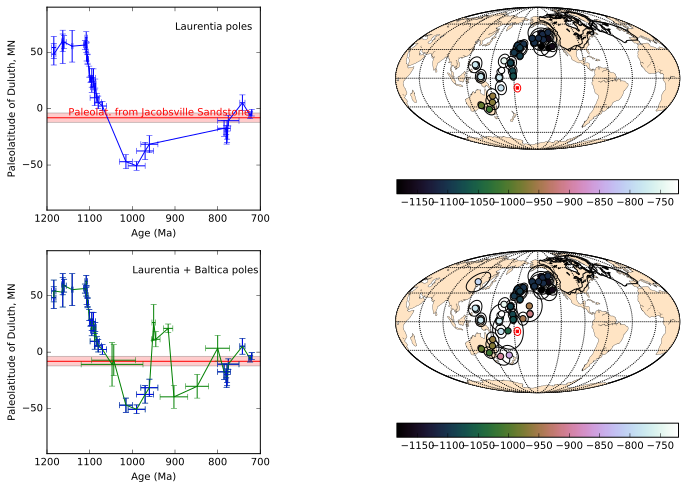

In [85]:
plt.figure(figsize=(13,8))
plt.subplot2grid((2,3), (0,1), colspan=2)
m = Basemap(projection='moll',lat_0=30,lon_0=210,resolution='c',area_thresh=50000)
m.readshapefile('../Data/Reconstruction/Laurentia_Baltica', 'Laurentia_Baltica', drawbounds=True, linewidth=1)
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white')
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
Laurentia_poles = Laurentia_poles.loc[Laurentia_poles['AgeNominal']<=1200]
Laurentia_poles = Laurentia_poles.loc[Laurentia_poles['AgeNominal']>=635]
Laurentia_poles.reset_index(inplace=True, drop=True)
centerlon, centerlat = m(Laurentia_poles['PLon_rot'].tolist(),Laurentia_poles['PLat_rot'].tolist())
for n in range(len(Laurentia_poles)):
    ipmag.plot_pole(m, Laurentia_poles['PLon_rot'][n],
                         Laurentia_poles['PLat_rot'][n], 
                         Laurentia_poles['A95'][n])
ipmag.plot_pole(m, 184, -10, 4.2, marker='s', color='r', markersize=6.0)
m.scatter(centerlon, centerlat, c=Laurentia_poles['AgeNominal_neg'].tolist(), cmap='cubehelix', s=40, zorder=101)
plt.colorbar(orientation='horizontal', shrink=0.6)

ax1 = plt.subplot2grid((2,3), (0,0), colspan=1)
ax1.add_patch(mpatch.Rectangle((1300, -12.2), -1000, 8.4, facecolor='r', alpha=0.2))
ax1.plot([-8.1]*2000, 'r-')
ax1.errorbar(Laurentia_poles['AgeNominal'].tolist(), 
             Laurentia_poles['Latitude'].tolist(), 
             yerr=Laurentia_poles['A95'].tolist(), 
             xerr=(Laurentia_poles['AgeUpper']-Laurentia_poles['AgeLower'])/2, c='b')
ax1.text(1150, -6,'Paleolat. from Jacobsville Sandstone', color='r',withdash=True)
ax1.text(900, 70,'Laurentia poles')
ax1.set_xlim(1200,700)
ax1.set_ylim(-90,90)
ax1.set_ylabel('Paleolatitude of Duluth, MN')
ax1.set_xlabel('Age (Ma)')

m = Basemap(projection='moll',lat_0=30,lon_0=210,resolution='c',area_thresh=50000)
plt.subplot2grid((2,3), (1,1), colspan=2)
m.readshapefile('../Data/Reconstruction/Laurentia_Baltica', 'Laurentia_Baltica', drawbounds=True, linewidth=1)
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white')
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
centerlon, centerlat = m(combined_poles['PLon_rot'].tolist(),combined_poles['PLat_rot'].tolist())
for n in range(len(combined_poles)):
    ipmag.plot_pole(m, combined_poles['PLon_rot'][n],
                         combined_poles['PLat_rot'][n], 
                         combined_poles['A95'][n])
ipmag.plot_pole(m, 184, -10, 4.2, marker='s', color='r', markersize=6.0)
m.scatter(centerlon, centerlat, c=combined_poles['AgeNominal_neg'].tolist(), cmap='cubehelix', s=40, zorder=101)
plt.colorbar(orientation='horizontal', shrink=0.6)

ax2 = plt.subplot2grid((2,3), (1,0), colspan=1)
ax2.add_patch(mpatch.Rectangle((1300, -12.2), -1000, 8.4, facecolor='r', alpha=0.2))
ax2.plot([-8.1]*2000, 'r-')
ax2.errorbar(combined_poles['AgeNominal'].tolist(), 
             combined_poles['Latitude'].tolist(), 
             yerr=combined_poles['A95'].tolist(), 
             xerr=(combined_poles['AgeUpper']-combined_poles['AgeLower'])/2, c='g')
for n in range(len(Laurentia_poles)):
    ax2.errorbar(Laurentia_poles['AgeNominal'][n], 
                 Laurentia_poles['Latitude'][n], 
                 yerr=Laurentia_poles['A95'][n], 
                 xerr=(Laurentia_poles['AgeUpper'][n]-Laurentia_poles['AgeLower'][n])/2, c='b')
    
ax2.text(1000, 70,'Laurentia + Baltica poles')
ax2.set_xlim(1200,700)
ax2.set_ylim(-90,90)
ax2.set_ylabel('Paleolatitude of Duluth, MN')
ax2.set_xlabel('Age (Ma)')


plt.savefig('Code_output/Laur_Bal_poles.svg')
plt.show()

## Map of late stage volcanics paleomagnetic sites

The following is an overview map of all paleomagnetic sites used in the preceding analysis.

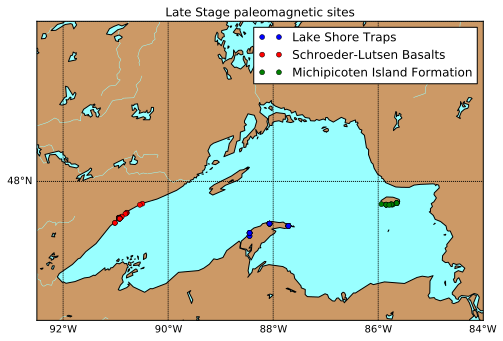

In [86]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='merc',llcrnrlat=46.2,urcrnrlat=50,llcrnrlon=-92.5,
            urcrnrlon=-84,resolution='i',area_thresh = 0.1) #lat_ts=-25
m.drawrivers(color='#99ffff')
m.drawcoastlines()
#m.drawcountries(linewidth=1.5)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
parallels = np.arange(-90,90,2.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
meridians = np.arange(0.,360.,2.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
plt.title('Late Stage paleomagnetic sites')

LST_site_lon=[]
LST_site_lat=[]
for n in range(0,len(Kulakov2013a_LST_Data)):
    LST_site_lon.append(Kulakov2013a_LST_Data['site_lon'][n])          
    LST_site_lat.append(Kulakov2013a_LST_Data['site_lat'][n])  
for n in range(0,len(Diehl1994a_LST_Data_all)):
    LST_site_lon.append(Diehl1994a_LST_Data_all['site_lon'][n])          
    LST_site_lat.append(Diehl1994a_LST_Data_all['site_lat'][n])
    
LST_x,LST_y = m(LST_site_lon,LST_site_lat)
m.plot(LST_x, LST_y, 'bo', markersize=5, 
       label='Lake Shore Traps')

SLB_x,SLB_y = m(NSVG_nsl['site_lon'].tolist()+SLB_Data['average_lon'].tolist(),
                NSVG_nsl['site_lat'].tolist()+SLB_Data['average_lat'].tolist())
m.plot(SLB_x, SLB_y, 'ro', markersize=5, 
       label='Schroeder-Lutsen Basalts')

MI_x,MI_y = m(SS_final_tc['average_lon'].tolist()+Palmer_data_trimmed['site_lon'].tolist(),
                SS_final_tc['average_lat'].tolist()+Palmer_data_trimmed['site_lat'].tolist())
m.plot(MI_x, MI_y, 'go', markersize=5, 
       label='Michipicoten Island Formation')
plt.legend()
plt.show()